<h1> EDA for Mozen Prototype (Tripoli station - 3 months of data)</h1>

<h2> Part 1: Raw Data Inventory </h2>

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

csv_path = r"C:\Users\m\Desktop\mozen\EDA\data\hourly_data.csv"

station = pd.read_csv(csv_path)
print("Loaded:", csv_path)
print("Shape:", station.shape)
display(station.head(10))

Loaded: C:\Users\m\Desktop\mozen\EDA\data\hourly_data.csv
Shape: (2763, 35)


,station_id,timestamp_utc,timestamp_local,epoch,latitude,longitude,solar_radiation_wm2,uv_index,windir_deg,humidity_pct,...,windchill_high_c,windchill_low_c,heatindex_c,heatindex_high_c,heatindex_low_c,pressure_hpa,pressure_min_hpa,pressure_trend_hpa,precip_rate_mmh,precip_total_mm
0,ITRIPO33,2025-10-11T22:00:00Z,10/12/2025 0:00,1760220000,32.881258,13.160197,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ITRIPO33,2025-10-11T22:59:31Z,10/12/2025 0:59,1760223571,32.881258,13.160197,0.00,0.0,0.0,59.0,...,27.0,27.0,28.0,28.0,28.0,1014.22,1013.55,0.00,0.0,0.0
2,ITRIPO33,2025-10-11T23:59:31Z,10/12/2025 1:59,1760227171,32.881258,13.160197,0.00,0.0,0.0,60.0,...,27.0,27.0,28.0,28.0,28.0,1014.22,1013.55,0.00,0.0,0.0
3,ITRIPO33,2025-10-12T00:59:31Z,10/12/2025 2:59,1760230771,32.881258,13.160197,0.00,0.0,0.0,60.0,...,27.0,27.0,28.0,28.0,28.0,1013.88,1013.55,-0.34,0.0,0.0
4,ITRIPO33,2025-10-12T01:59:31Z,10/12/2025 3:59,1760234371,32.881258,13.160197,0.00,0.0,0.0,62.0,...,27.0,26.0,28.0,28.0,28.0,1013.55,1012.87,-0.34,0.0,0.0
5,ITRIPO33,2025-10-12T02:59:31Z,10/12/2025 4:59,1760237971,32.881258,13.160197,0.00,0.0,0.0,62.0,...,27.0,26.0,28.0,28.0,28.0,1013.21,1012.87,-0.34,0.0,0.0
6,ITRIPO33,2025-10-12T03:59:31Z,10/12/2025 5:59,1760241571,32.881258,13.160197,0.00,0.0,0.0,63.0,...,26.0,26.0,28.0,28.0,28.0,1013.21,1012.53,0.00,0.0,0.0
7,ITRIPO33,2025-10-12T04:59:31Z,10/12/2025 6:59,1760245171,32.881258,13.160197,0.00,0.0,0.0,63.0,...,26.0,26.0,27.0,28.0,27.0,1013.21,1012.87,0.34,0.0,0.0
8,ITRIPO33,2025-10-12T05:59:31Z,10/12/2025 7:59,1760248771,32.881258,13.160197,0.02,0.0,0.0,63.0,...,26.0,26.0,27.0,27.0,27.0,1013.55,1012.87,0.34,0.0,0.0
9,ITRIPO33,2025-10-12T06:59:31Z,10/12/2025 8:59,1760252371,32.881258,13.160197,0.05,0.0,0.0,61.0,...,26.0,26.0,26.0,27.0,26.0,1014.22,1013.21,0.34,0.0,0.0


In [2]:
print("Columns:")
print(station.columns.tolist())

print("\nDtypes:")
display(station.dtypes.astype(str).rename("dtype").to_frame())

Columns:
['station_id', 'timestamp_utc', 'timestamp_local', 'epoch', 'latitude', 'longitude', 'solar_radiation_wm2', 'uv_index', 'windir_deg', 'humidity_pct', 'humidity_high_pct', 'humidity_low_pct', 'temp_c', 'temp_high_c', 'temp_low_c', 'windspeed_kmh', 'windspeed_high_kmh', 'windspeed_low_kmh', 'windgust_kmh', 'windgust_high_kmh', 'windgust_low_kmh', 'dewpoint_c', 'dewpoint_high_c', 'dewpoint_low_c', 'windchill_c', 'windchill_high_c', 'windchill_low_c', 'heatindex_c', 'heatindex_high_c', 'heatindex_low_c', 'pressure_hpa', 'pressure_min_hpa', 'pressure_trend_hpa', 'precip_rate_mmh', 'precip_total_mm']

Dtypes:


,dtype
station_id,object
timestamp_utc,object
timestamp_local,object
epoch,int64
latitude,float64
longitude,float64
solar_radiation_wm2,float64
uv_index,float64
windir_deg,float64
humidity_pct,float64


In [3]:
time_col = "timestamp_utc"

station["timestamp_utc_parsed"] = pd.to_datetime(
    station[time_col], utc=True, errors="coerce"
)

inventory = {
    "rows": int(len(station)),
    "num_columns": int(station.shape[1]),
    "min_time_utc": station["timestamp_utc_parsed"].min(),
    "max_time_utc": station["timestamp_utc_parsed"].max(),
    "null_timestamps": int(station["timestamp_utc_parsed"].isna().sum()),
    "duplicate_raw_timestamp_rows": int(station.duplicated(subset=[time_col]).sum()),
    "unique_station_ids": int(station["station_id"].nunique()) if "station_id" in station.columns else np.nan,
}

inv_df = pd.DataFrame([inventory])
display(inv_df)

,rows,num_columns,min_time_utc,max_time_utc,null_timestamps,duplicate_raw_timestamp_rows,unique_station_ids
0,2763,36,2025-10-11 22:00:00+00:00,2026-02-03 23:00:00+00:00,0,0,1


<h2>Part 2: Station Cleaning </h2>

In [4]:
station["hour_utc"] = (station["timestamp_utc_parsed"] + pd.Timedelta(minutes=30)).dt.floor("h")
station[[time_col, "timestamp_utc_parsed", "hour_utc"]].head(10)

,timestamp_utc,timestamp_utc_parsed,hour_utc
0,2025-10-11T22:00:00Z,2025-10-11 22:00:00+00:00,2025-10-11 22:00:00+00:00
1,2025-10-11T22:59:31Z,2025-10-11 22:59:31+00:00,2025-10-11 23:00:00+00:00
2,2025-10-11T23:59:31Z,2025-10-11 23:59:31+00:00,2025-10-12 00:00:00+00:00
3,2025-10-12T00:59:31Z,2025-10-12 00:59:31+00:00,2025-10-12 01:00:00+00:00
4,2025-10-12T01:59:31Z,2025-10-12 01:59:31+00:00,2025-10-12 02:00:00+00:00
5,2025-10-12T02:59:31Z,2025-10-12 02:59:31+00:00,2025-10-12 03:00:00+00:00
6,2025-10-12T03:59:31Z,2025-10-12 03:59:31+00:00,2025-10-12 04:00:00+00:00
7,2025-10-12T04:59:31Z,2025-10-12 04:59:31+00:00,2025-10-12 05:00:00+00:00
8,2025-10-12T05:59:31Z,2025-10-12 05:59:31+00:00,2025-10-12 06:00:00+00:00
9,2025-10-12T06:59:31Z,2025-10-12 06:59:31+00:00,2025-10-12 07:00:00+00:00


In [5]:
before = len(station)
station = station.drop_duplicates().copy()
after = len(station)

print("Exact duplicates removed:", before - after)
print("Current shape:", station.shape)

Exact duplicates removed: 0
Current shape: (2763, 37)


In [6]:
group_keys = ["hour_utc"] if "station_id" not in station.columns else ["station_id", "hour_utc"]

value_cols = [c for c in station.columns if c not in [time_col, "timestamp_utc_parsed", "hour_utc"]]

hour_counts = station.groupby(group_keys).size().rename("n_records_in_hour").reset_index()

agg_map = {}
for c in value_cols:
    if pd.api.types.is_numeric_dtype(station[c]):
        agg_map[c] = "max" if "gust" in c.lower() else "mean"
    else:
        agg_map[c] = "last"

station_clean = (
    station.sort_values("timestamp_utc_parsed")
           .groupby(group_keys, as_index=False)
           .agg(agg_map)
           .merge(hour_counts, on=group_keys, how="left")
)

print("station_clean shape:", station_clean.shape)
station_clean.head(10)

station_clean shape: (2762, 36)


,hour_utc,station_id,timestamp_local,epoch,latitude,longitude,solar_radiation_wm2,uv_index,windir_deg,humidity_pct,...,windchill_low_c,heatindex_c,heatindex_high_c,heatindex_low_c,pressure_hpa,pressure_min_hpa,pressure_trend_hpa,precip_rate_mmh,precip_total_mm,n_records_in_hour
0,2025-10-11 22:00:00+00:00,ITRIPO33,10/12/2025 0:00,1.760220e+09,32.881258,13.160197,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2025-10-11 23:00:00+00:00,ITRIPO33,10/12/2025 0:59,1.760224e+09,32.881258,13.160197,0.00,0.0,0.0,59.0,...,27.0,28.0,28.0,28.0,1014.22,1013.55,0.00,0.0,0.0,1
2,2025-10-12 00:00:00+00:00,ITRIPO33,10/12/2025 1:59,1.760227e+09,32.881258,13.160197,0.00,0.0,0.0,60.0,...,27.0,28.0,28.0,28.0,1014.22,1013.55,0.00,0.0,0.0,1
3,2025-10-12 01:00:00+00:00,ITRIPO33,10/12/2025 2:59,1.760231e+09,32.881258,13.160197,0.00,0.0,0.0,60.0,...,27.0,28.0,28.0,28.0,1013.88,1013.55,-0.34,0.0,0.0,1
4,2025-10-12 02:00:00+00:00,ITRIPO33,10/12/2025 3:59,1.760234e+09,32.881258,13.160197,0.00,0.0,0.0,62.0,...,26.0,28.0,28.0,28.0,1013.55,1012.87,-0.34,0.0,0.0,1
5,2025-10-12 03:00:00+00:00,ITRIPO33,10/12/2025 4:59,1.760238e+09,32.881258,13.160197,0.00,0.0,0.0,62.0,...,26.0,28.0,28.0,28.0,1013.21,1012.87,-0.34,0.0,0.0,1
6,2025-10-12 04:00:00+00:00,ITRIPO33,10/12/2025 5:59,1.760242e+09,32.881258,13.160197,0.00,0.0,0.0,63.0,...,26.0,28.0,28.0,28.0,1013.21,1012.53,0.00,0.0,0.0,1
7,2025-10-12 05:00:00+00:00,ITRIPO33,10/12/2025 6:59,1.760245e+09,32.881258,13.160197,0.00,0.0,0.0,63.0,...,26.0,27.0,28.0,27.0,1013.21,1012.87,0.34,0.0,0.0,1
8,2025-10-12 06:00:00+00:00,ITRIPO33,10/12/2025 7:59,1.760249e+09,32.881258,13.160197,0.02,0.0,0.0,63.0,...,26.0,27.0,27.0,27.0,1013.55,1012.87,0.34,0.0,0.0,1
9,2025-10-12 07:00:00+00:00,ITRIPO33,10/12/2025 8:59,1.760252e+09,32.881258,13.160197,0.05,0.0,0.0,61.0,...,26.0,26.0,27.0,26.0,1014.22,1013.21,0.34,0.0,0.0,1


In [7]:
dup_keys = station_clean.duplicated(subset=group_keys).sum()
print("Duplicate hourly keys after cleaning:", int(dup_keys))

print("Min hour_utc:", station_clean["hour_utc"].min())
print("Max hour_utc:", station_clean["hour_utc"].max())

print("Hours with >1 raw record:", int((station_clean["n_records_in_hour"] > 1).sum()))

Duplicate hourly keys after cleaning: 0
Min hour_utc: 2025-10-11 22:00:00+00:00
Max hour_utc: 2026-02-03 23:00:00+00:00
Hours with >1 raw record: 1


In [8]:
if "station_id" in station_clean.columns:
    gaps = (
        station_clean.sort_values(["station_id", "hour_utc"])
                     .groupby("station_id")["hour_utc"]
                     .diff()
                     .dt.total_seconds()
                     .div(3600)
    )
else:
    gaps = (
        station_clean.sort_values("hour_utc")["hour_utc"]
                     .diff()
                     .dt.total_seconds()
                     .div(3600)
    )

display(gaps.value_counts(dropna=True).head(15).to_frame("count"))

,count
hour_utc,
1.0,2761


<h2> Part 3: API base pull and merge </h2>

In [9]:
lat = 32.8872
lon = 13.1913

start_date = station_clean["hour_utc"].min().strftime("%Y-%m-%d")
end_date   = station_clean["hour_utc"].max().strftime("%Y-%m-%d")

print("API range:", start_date, "to", end_date)

API range: 2025-10-11 to 2026-02-03


In [10]:
hourly_vars = [
    "temperature_2m",
    "relative_humidity_2m",
    "dew_point_2m",
    "apparent_temperature",
    "pressure_msl",
    "surface_pressure",
    "precipitation",
    "rain",
    "snowfall",
    "snow_depth",
    "cloud_cover",
    "cloud_cover_low",
    "cloud_cover_mid",
    "cloud_cover_high",
    "visibility",
    "evapotranspiration",
    "et0_fao_evapotranspiration",
    "vapour_pressure_deficit",
    "wind_speed_10m",
    "wind_direction_10m",
    "wind_gusts_10m",
    "weather_code",
    "shortwave_radiation",
    "direct_radiation",
    "direct_normal_irradiance",
    "diffuse_radiation",
    "sunshine_duration",
    "wind_speed_100m",
    "wind_direction_100m",
]

daily_vars = [
    "sunrise",
    "sunset",
    "daylight_duration",
    "sunshine_duration",
]

params = {
    "latitude": lat,
    "longitude": lon,
    "start_date": start_date,
    "end_date": end_date,
    "hourly": ",".join(hourly_vars),   
    "daily": ",".join(daily_vars),
    "timezone": "UTC",                 
    "temperature_unit": "celsius",
    "wind_speed_unit": "kmh",
}

url = "https://archive-api.open-meteo.com/v1/archive"
resp = requests.get(url, params=params, timeout=60)

if not resp.ok:
    print("Status:", resp.status_code)
    print("URL sent:", resp.url)
    print("Response text:", resp.text[:2000]) 
    resp.raise_for_status()

obj = resp.json()
print("API OK")
print("Top-level keys:", list(obj.keys()))
print("Hourly keys count:", len(obj.get("hourly", {}).keys()))
print("Daily keys:", list(obj.get("daily", {}).keys()))

API OK
Top-level keys: ['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly', 'daily_units', 'daily']
Hourly keys count: 30
Daily keys: ['time', 'sunrise', 'sunset', 'daylight_duration', 'sunshine_duration']


In [11]:
base_df = pd.DataFrame(obj["hourly"]).copy()
base_df["hour_utc"] = pd.to_datetime(base_df["time"], utc=True, errors="coerce")
base_df = base_df.drop(columns=["time"], errors="ignore")

rename_map = {
    "temperature_2m": "base_temp_c",
    "relative_humidity_2m": "base_humidity_pct",
    "dew_point_2m": "base_dewpoint_c",
    "apparent_temperature": "base_apparent_temp_c",
    "pressure_msl": "base_pressure_msl_hpa",
    "surface_pressure": "base_surface_pressure_hpa",
    "precipitation": "base_precip_mm",
    "rain": "base_rain_mm",
    "snowfall": "base_snowfall_cm",
    "snow_depth": "base_snow_depth_m",
    "cloud_cover": "base_cloudcover_pct",
    "cloud_cover_low": "base_cloudcover_low_pct",
    "cloud_cover_mid": "base_cloudcover_mid_pct",
    "cloud_cover_high": "base_cloudcover_high_pct",
    "visibility": "base_visibility_m",
    "evapotranspiration": "base_evapotranspiration_mm",
    "et0_fao_evapotranspiration": "base_et0_fao_mm",
    "vapour_pressure_deficit": "base_vpd_kpa",
    "wind_speed_10m": "base_windspeed_kmh",
    "wind_direction_10m": "base_winddirection_deg",
    "wind_gusts_10m": "base_windgusts_kmh",
    "weather_code": "base_weather_code",
    "shortwave_radiation": "base_shortwave_wm2",
    "direct_radiation": "base_direct_wm2",
    "direct_normal_irradiance": "base_dni_wm2",
    "diffuse_radiation": "base_diffuse_wm2",
    "sunshine_duration": "base_sunshine_sec",
    "wind_speed_100m": "base_windspeed100_kmh",
    "wind_direction_100m": "base_winddir100_deg",
}

base_df = base_df.rename(columns=rename_map)
base_df = (
    base_df.dropna(subset=["hour_utc"])
           .drop_duplicates(subset=["hour_utc"])
           .sort_values("hour_utc")
           .reset_index(drop=True)
)

daily_df = pd.DataFrame(obj["daily"]).copy()
daily_df["date_utc"] = pd.to_datetime(daily_df["time"], utc=True, errors="coerce").dt.floor("D")
daily_df["sunrise_utc"] = pd.to_datetime(daily_df["sunrise"], utc=True, errors="coerce")
daily_df["sunset_utc"] = pd.to_datetime(daily_df["sunset"], utc=True, errors="coerce")

daily_df = daily_df.rename(columns={
    "daylight_duration": "daylight_duration_sec",
    "sunshine_duration": "sunshine_duration_day_sec",
})

daily_keep = [
    "date_utc", "sunrise_utc", "sunset_utc",
    "daylight_duration_sec", "sunshine_duration_day_sec"
]
daily_df = daily_df[daily_keep].drop_duplicates(subset=["date_utc"])

base_df["date_utc"] = base_df["hour_utc"].dt.floor("D")
base_df = base_df.merge(daily_df, on="date_utc", how="left")

base_df["minutes_from_sunrise"] = (
    (base_df["hour_utc"] - base_df["sunrise_utc"]).dt.total_seconds() / 60.0
)
base_df["minutes_to_sunset"] = (
    (base_df["sunset_utc"] - base_df["hour_utc"]).dt.total_seconds() / 60.0
)
base_df["is_day_from_sun"] = (
    (base_df["hour_utc"] >= base_df["sunrise_utc"]) &
    (base_df["hour_utc"] <= base_df["sunset_utc"])
).astype("Int64")

display(base_df.head(5))

,base_temp_c,base_humidity_pct,base_dewpoint_c,base_apparent_temp_c,base_pressure_msl_hpa,base_surface_pressure_hpa,base_precip_mm,base_rain_mm,base_snowfall_cm,base_snow_depth_m,...,base_winddir100_deg,hour_utc,date_utc,sunrise_utc,sunset_utc,daylight_duration_sec,sunshine_duration_day_sec,minutes_from_sunrise,minutes_to_sunset,is_day_from_sun
0,21.9,58,13.3,21.3,1022.2,1020.4,0.0,0.0,0.0,0.0,...,126,2025-10-11 00:00:00+00:00,2025-10-11 00:00:00+00:00,2025-10-11 05:08:00+00:00,2025-10-11 16:38:00+00:00,41423.13,36306.39,-308.0,998.0,0
1,21.5,60,13.4,21.1,1021.8,1020.0,0.0,0.0,0.0,0.0,...,127,2025-10-11 01:00:00+00:00,2025-10-11 00:00:00+00:00,2025-10-11 05:08:00+00:00,2025-10-11 16:38:00+00:00,41423.13,36306.39,-248.0,938.0,0
2,21.1,62,13.6,20.8,1021.8,1020.0,0.0,0.0,0.0,0.0,...,129,2025-10-11 02:00:00+00:00,2025-10-11 00:00:00+00:00,2025-10-11 05:08:00+00:00,2025-10-11 16:38:00+00:00,41423.13,36306.39,-188.0,878.0,0
3,20.8,64,13.6,20.6,1021.7,1019.9,0.0,0.0,0.0,0.0,...,131,2025-10-11 03:00:00+00:00,2025-10-11 00:00:00+00:00,2025-10-11 05:08:00+00:00,2025-10-11 16:38:00+00:00,41423.13,36306.39,-128.0,818.0,0
4,20.5,65,13.8,20.4,1022.0,1020.2,0.0,0.0,0.0,0.0,...,127,2025-10-11 04:00:00+00:00,2025-10-11 00:00:00+00:00,2025-10-11 05:08:00+00:00,2025-10-11 16:38:00+00:00,41423.13,36306.39,-68.0,758.0,0


In [12]:
merged = station_clean.merge(base_df, on="hour_utc", how="inner").copy()

print("station_clean rows:", len(station_clean))
print("base_df rows:", len(base_df))
print("merged rows:", len(merged))
print("merge retention vs station_clean: {:.2f}%".format(100 * len(merged) / max(len(station_clean), 1)))

display(merged.head(5))

station_clean rows: 2762
base_df rows: 2784
merged rows: 2762
merge retention vs station_clean: 100.00%


,hour_utc,station_id,timestamp_local,epoch,latitude,longitude,solar_radiation_wm2,uv_index,windir_deg,humidity_pct,...,base_windspeed100_kmh,base_winddir100_deg,date_utc,sunrise_utc,sunset_utc,daylight_duration_sec,sunshine_duration_day_sec,minutes_from_sunrise,minutes_to_sunset,is_day_from_sun
0,2025-10-11 22:00:00+00:00,ITRIPO33,10/12/2025 0:00,1.760220e+09,32.881258,13.160197,NaN,NaN,NaN,NaN,...,20.8,113,2025-10-11 00:00:00+00:00,2025-10-11 05:08:00+00:00,2025-10-11 16:38:00+00:00,41423.13,36306.39,1012.0,-322.0,0
1,2025-10-11 23:00:00+00:00,ITRIPO33,10/12/2025 0:59,1.760224e+09,32.881258,13.160197,0.0,0.0,0.0,59.0,...,18.7,122,2025-10-11 00:00:00+00:00,2025-10-11 05:08:00+00:00,2025-10-11 16:38:00+00:00,41423.13,36306.39,1072.0,-382.0,0
2,2025-10-12 00:00:00+00:00,ITRIPO33,10/12/2025 1:59,1.760227e+09,32.881258,13.160197,0.0,0.0,0.0,60.0,...,17.0,141,2025-10-12 00:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,41305.98,36088.58,-309.0,997.0,0
3,2025-10-12 01:00:00+00:00,ITRIPO33,10/12/2025 2:59,1.760231e+09,32.881258,13.160197,0.0,0.0,0.0,60.0,...,15.5,154,2025-10-12 00:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,41305.98,36088.58,-249.0,937.0,0
4,2025-10-12 02:00:00+00:00,ITRIPO33,10/12/2025 3:59,1.760234e+09,32.881258,13.160197,0.0,0.0,0.0,62.0,...,12.3,140,2025-10-12 00:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,41305.98,36088.58,-189.0,877.0,0


In [13]:
station_temp_col = "temp_c"
station_wind_col = "windspeed_kmh"

merged["temp_error_c"] = merged[station_temp_col] - merged["base_temp_c"]
merged["wind_error_kmh"] = merged[station_wind_col] - merged["base_windspeed_kmh"]

display(merged[[
    "hour_utc",
    station_temp_col, "base_temp_c", "temp_error_c",
    station_wind_col, "base_windspeed_kmh", "wind_error_kmh"
]].head(10))


,hour_utc,temp_c,base_temp_c,temp_error_c,windspeed_kmh,base_windspeed_kmh,wind_error_kmh
0,2025-10-11 22:00:00+00:00,NaN,23.0,NaN,NaN,11.9,NaN
1,2025-10-11 23:00:00+00:00,27.0,22.5,4.5,0.0,10.1,-10.1
2,2025-10-12 00:00:00+00:00,27.0,21.5,5.5,0.0,8.6,-8.6
3,2025-10-12 01:00:00+00:00,27.0,21.0,6.0,0.0,7.4,-7.4
4,2025-10-12 02:00:00+00:00,27.0,20.7,6.3,0.0,6.1,-6.1
5,2025-10-12 03:00:00+00:00,27.0,20.4,6.6,0.0,5.8,-5.8
6,2025-10-12 04:00:00+00:00,26.0,19.9,6.1,0.0,6.9,-6.9
7,2025-10-12 05:00:00+00:00,26.0,19.6,6.4,0.0,5.7,-5.7
8,2025-10-12 06:00:00+00:00,26.0,20.7,5.3,0.0,6.6,-6.6
9,2025-10-12 07:00:00+00:00,26.0,22.2,3.8,0.0,7.3,-7.3


In [14]:
coverage_days = int((merged["hour_utc"].max() - merged["hour_utc"].min()).days + 1)
print("coverage_days =", coverage_days)

coverage_days = 116


In [15]:
if coverage_days >= 60:
    merged["rh_error_pct"]       = merged["humidity_pct"]   - merged["base_humidity_pct"]
    merged["dewpoint_error_c"]   = merged["dewpoint_c"]     - merged["base_dewpoint_c"]
    merged["pressure_error_hpa"] = merged["pressure_hpa"]   - merged["base_surface_pressure_hpa"]
    merged["gust_error_kmh"]     = merged["windgust_high_kmh"]   - merged["base_windgusts_kmh"]
    print("Added: humidity, dewpoint, pressure, gust targets")
else:
    print("Skipped group 1 (need >= 60 days)")
    
if coverage_days >= 90:

    print("Added: wind direction, rain targets")
else:
    print("Skipped group 2 (need >= 90 days)")

new_targets = [c for c in [
    "temp_error_c", "wind_error_kmh",
    "rh_error_pct", "dewpoint_error_c", "pressure_error_hpa", "gust_error_kmh",
    "winddir_error_deg", "rain_error_mm", "rain_obs_event", "rain_base_event",
    "uv_error_index"
] if c in merged.columns]

print("Targets now:", new_targets)
display(merged[["hour_utc"] + new_targets].head(10))

Added: humidity, dewpoint, pressure, gust targets
Added: wind direction, rain targets
Targets now: ['temp_error_c', 'wind_error_kmh', 'rh_error_pct', 'dewpoint_error_c', 'pressure_error_hpa', 'gust_error_kmh']


,hour_utc,temp_error_c,wind_error_kmh,rh_error_pct,dewpoint_error_c,pressure_error_hpa,gust_error_kmh
0,2025-10-11 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-10-11 23:00:00+00:00,4.5,-10.1,-7.0,2.1,-6.68,-24.8
2,2025-10-12 00:00:00+00:00,5.5,-8.6,-9.0,2.5,-6.48,-20.9
3,2025-10-12 01:00:00+00:00,6.0,-7.4,-10.0,2.7,-6.52,-17.3
4,2025-10-12 02:00:00+00:00,6.3,-6.1,-9.0,3.7,-6.55,-14.4
5,2025-10-12 03:00:00+00:00,6.6,-5.8,-11.0,3.7,-6.59,-11.5
6,2025-10-12 04:00:00+00:00,6.1,-6.9,-12.0,3.8,-6.49,-13.3
7,2025-10-12 05:00:00+00:00,6.4,-5.7,-12.0,3.9,-6.79,-13.3
8,2025-10-12 06:00:00+00:00,5.3,-6.6,-8.0,3.8,-6.85,-11.2
9,2025-10-12 07:00:00+00:00,3.8,-7.3,-8.0,1.7,-6.78,-18.0


In [16]:
if (coverage_days >= 360) and ("base_uv_index" in merged.columns):
    merged["uv_target"] = merged["uv_index"] - merged["base_uv_index"]
    uv_mode = "residual"
else:
    merged["uv_target"] = merged["uv_index"].clip(lower=0)
    uv_mode = "proxy_direct"
print("UV mode:", uv_mode)
uv_feature_cols = [
    "base_shortwave_wm2",
    "base_direct_wm2",
    "base_diffuse_wm2",
    "base_cloudcover_pct",
    "daylight_duration_sec",
    "sunshine_duration_day_sec",
]
uv_feature_cols = [c for c in uv_feature_cols if c in merged.columns]
print("UV features:", uv_feature_cols)
if "sunrise_utc" in merged.columns and "sunset_utc" in merged.columns:
    is_night = (merged["hour_utc"] < merged["sunrise_utc"]) | (merged["hour_utc"] > merged["sunset_utc"])
    merged.loc[is_night, "uv_target"] = 0.0

UV mode: proxy_direct
UV features: ['base_shortwave_wm2', 'base_direct_wm2', 'base_diffuse_wm2', 'base_cloudcover_pct', 'daylight_duration_sec', 'sunshine_duration_day_sec']


<h2>Part 4: Feature Engineering </h2>

In [17]:
fe = merged.copy()
print("fe shape:", fe.shape)
display(fe.head(3))

fe shape: (2762, 80)


,hour_utc,station_id,timestamp_local,epoch,latitude,longitude,solar_radiation_wm2,uv_index,windir_deg,humidity_pct,...,minutes_from_sunrise,minutes_to_sunset,is_day_from_sun,temp_error_c,wind_error_kmh,rh_error_pct,dewpoint_error_c,pressure_error_hpa,gust_error_kmh,uv_target
0,2025-10-11 22:00:00+00:00,ITRIPO33,10/12/2025 0:00,1.760220e+09,32.881258,13.160197,NaN,NaN,NaN,NaN,...,1012.0,-322.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2025-10-11 23:00:00+00:00,ITRIPO33,10/12/2025 0:59,1.760224e+09,32.881258,13.160197,0.0,0.0,0.0,59.0,...,1072.0,-382.0,0,4.5,-10.1,-7.0,2.1,-6.68,-24.8,0.0
2,2025-10-12 00:00:00+00:00,ITRIPO33,10/12/2025 1:59,1.760227e+09,32.881258,13.160197,0.0,0.0,0.0,60.0,...,-309.0,997.0,0,5.5,-8.6,-9.0,2.5,-6.48,-20.9,0.0


In [18]:
coverage_days = int((fe["hour_utc"].max() - fe["hour_utc"].min()).days + 1)
ENABLE_DOY = coverage_days >= 730  # 2+ years rule

print("coverage_days:", coverage_days)
print("ENABLE_DOY:", ENABLE_DOY)

coverage_days: 116
ENABLE_DOY: False


In [19]:
fe = fe.sort_values("hour_utc").reset_index(drop=True).copy()

fe["hour"] = fe["hour_utc"].dt.hour
fe["month"] = fe["hour_utc"].dt.month
fe["date_utc"] = fe["hour_utc"].dt.floor("D")

display(fe[["hour_utc", "date_utc", "hour", "month"]].head(25))

,hour_utc,date_utc,hour,month
0,2025-10-11 22:00:00+00:00,2025-10-11 00:00:00+00:00,22,10
1,2025-10-11 23:00:00+00:00,2025-10-11 00:00:00+00:00,23,10
2,2025-10-12 00:00:00+00:00,2025-10-12 00:00:00+00:00,0,10
3,2025-10-12 01:00:00+00:00,2025-10-12 00:00:00+00:00,1,10
4,2025-10-12 02:00:00+00:00,2025-10-12 00:00:00+00:00,2,10
5,2025-10-12 03:00:00+00:00,2025-10-12 00:00:00+00:00,3,10
6,2025-10-12 04:00:00+00:00,2025-10-12 00:00:00+00:00,4,10
7,2025-10-12 05:00:00+00:00,2025-10-12 00:00:00+00:00,5,10
8,2025-10-12 06:00:00+00:00,2025-10-12 00:00:00+00:00,6,10
9,2025-10-12 07:00:00+00:00,2025-10-12 00:00:00+00:00,7,10


In [20]:
fe["hour_sin"] = np.sin(2 * np.pi * fe["hour"] / 24.0)
fe["hour_cos"] = np.cos(2 * np.pi * fe["hour"] / 24.0)

hour_angle = np.arctan2(fe["hour_sin"], fe["hour_cos"]) 
fe["hour_circular_0_24"] = (hour_angle % (2*np.pi)) * 24 / (2*np.pi)

display(fe[["hour", "hour_sin", "hour_cos", "hour_circular_0_24"]].head(25))

,hour,hour_sin,hour_cos,hour_circular_0_24
0,22,-5.000000e-01,8.660254e-01,22.0
1,23,-2.588190e-01,9.659258e-01,23.0
2,0,0.000000e+00,1.000000e+00,0.0
3,1,2.588190e-01,9.659258e-01,1.0
4,2,5.000000e-01,8.660254e-01,2.0
5,3,7.071068e-01,7.071068e-01,3.0
6,4,8.660254e-01,5.000000e-01,4.0
7,5,9.659258e-01,2.588190e-01,5.0
8,6,1.000000e+00,6.123234e-17,6.0
9,7,9.659258e-01,-2.588190e-01,7.0


In [21]:
if ENABLE_DOY:
    fe["doy"] = fe["hour_utc"].dt.dayofyear
    fe["doy_sin"] = np.sin(2 * np.pi * fe["doy"] / 365.25)
    fe["doy_cos"] = np.cos(2 * np.pi * fe["doy"] / 365.25)
    print("DOY features added.")
    display(fe[["hour_utc", "doy", "doy_sin", "doy_cos"]].head(10))
else:
    print("DOY features skipped (< 2 years of data).")

DOY features skipped (< 2 years of data).


In [22]:
required = ["sunrise_utc", "sunset_utc", "daylight_duration_sec"]
if all(c in fe.columns for c in required):

    fe["sunrise_utc"] = pd.to_datetime(fe["sunrise_utc"], utc=True, errors="coerce")
    fe["sunset_utc"]  = pd.to_datetime(fe["sunset_utc"],  utc=True, errors="coerce")

    fe["minutes_from_sunrise_raw"] = (fe["hour_utc"] - fe["sunrise_utc"]).dt.total_seconds() / 60.0
    fe["minutes_to_sunset_raw"]    = (fe["sunset_utc"] - fe["hour_utc"]).dt.total_seconds() / 60.0

    fe["is_day"] = ((fe["hour_utc"] >= fe["sunrise_utc"]) & (fe["hour_utc"] <= fe["sunset_utc"])).astype(int)

    daylight_min = (fe["daylight_duration_sec"] / 60.0).replace(0, np.nan)
    raw_progress = fe["minutes_from_sunrise_raw"] / daylight_min

    fe["minutes_from_sunrise"] = np.where(fe["is_day"] == 1, fe["minutes_from_sunrise_raw"], 0.0)
    fe["minutes_to_sunset"]    = np.where(fe["is_day"] == 1, fe["minutes_to_sunset_raw"], 0.0)
    fe["solar_progress_0_1"]   = np.where(fe["is_day"] == 1, raw_progress.clip(0, 1), 0.0)
    fe["solar_cycle"]          = np.where(fe["is_day"] == 1, np.sin(np.pi * fe["solar_progress_0_1"]), 0.0)
    fe["solar_centered"]       = np.where(fe["is_day"] == 1, 2*fe["solar_progress_0_1"] - 1, 0.0)

    cols = [
        "hour_utc", "sunrise_utc", "sunset_utc", "is_day",
        "minutes_from_sunrise_raw", "minutes_to_sunset_raw",
        "minutes_from_sunrise", "minutes_to_sunset",
        "solar_progress_0_1", "solar_cycle", "solar_centered"
    ]
    display(fe[cols].head(25))

    display(fe[["minutes_from_sunrise","minutes_to_sunset","solar_progress_0_1","solar_centered"]]
            .isna().mean().mul(100).rename("missing_%").to_frame())

else:
    print("Missing sunrise/sunset/daylight columns, skipped sun features.")

,hour_utc,sunrise_utc,sunset_utc,is_day,minutes_from_sunrise_raw,minutes_to_sunset_raw,minutes_from_sunrise,minutes_to_sunset,solar_progress_0_1,solar_cycle,solar_centered
0,2025-10-11 22:00:00+00:00,2025-10-11 05:08:00+00:00,2025-10-11 16:38:00+00:00,0,1012.0,-322.0,0.0,0.0,0.000000,0.000000,0.000000
1,2025-10-11 23:00:00+00:00,2025-10-11 05:08:00+00:00,2025-10-11 16:38:00+00:00,0,1072.0,-382.0,0.0,0.0,0.000000,0.000000,0.000000
2,2025-10-12 00:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,0,-309.0,997.0,0.0,0.0,0.000000,0.000000,0.000000
3,2025-10-12 01:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,0,-249.0,937.0,0.0,0.0,0.000000,0.000000,0.000000
4,2025-10-12 02:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,0,-189.0,877.0,0.0,0.0,0.000000,0.000000,0.000000
5,2025-10-12 03:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,0,-129.0,817.0,0.0,0.0,0.000000,0.000000,0.000000
6,2025-10-12 04:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,0,-69.0,757.0,0.0,0.0,0.000000,0.000000,0.000000
7,2025-10-12 05:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,0,-9.0,697.0,0.0,0.0,0.000000,0.000000,0.000000
8,2025-10-12 06:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,1,51.0,637.0,51.0,637.0,0.074081,0.230638,-0.851837
9,2025-10-12 07:00:00+00:00,2025-10-12 05:09:00+00:00,2025-10-12 16:37:00+00:00,1,111.0,577.0,111.0,577.0,0.161236,0.485152,-0.677529


,missing_%
minutes_from_sunrise,0.0
minutes_to_sunset,0.0
solar_progress_0_1,0.0
solar_centered,0.0


In [23]:
if "base_winddirection_deg" in fe.columns:
    base_rad = np.deg2rad(fe["base_winddirection_deg"] % 360.0)
    fe["base_winddir_sin"] = np.sin(base_rad)
    fe["base_winddir_cos"] = np.cos(base_rad)

    fe["base_winddir_deg_reconstructed"] = (
        np.degrees(np.arctan2(fe["base_winddir_sin"], fe["base_winddir_cos"])) + 360.0
    ) % 360.0

if "windir_deg" in fe.columns:
    st_rad = np.deg2rad(fe["windir_deg"] % 360.0)
    fe["station_winddir_sin"] = np.sin(st_rad)
    fe["station_winddir_cos"] = np.cos(st_rad)

display(fe[[c for c in [
    "base_winddirection_deg", "base_winddir_sin", "base_winddir_cos", "base_winddir_deg_reconstructed",
    "windir_deg", "station_winddir_sin", "station_winddir_cos"
] if c in fe.columns]].head(25))

,base_winddirection_deg,base_winddir_sin,base_winddir_cos,base_winddir_deg_reconstructed,windir_deg,station_winddir_sin,station_winddir_cos
0,117,0.891007,-0.453990,117.0,NaN,NaN,NaN
1,129,0.777146,-0.629320,129.0,0.0,0.0,1.0
2,149,0.515038,-0.857167,149.0,0.0,0.0,1.0
3,167,0.224951,-0.974370,167.0,0.0,0.0,1.0
4,137,0.681998,-0.731354,137.0,0.0,0.0,1.0
5,129,0.777146,-0.629320,129.0,0.0,0.0,1.0
6,152,0.469472,-0.882948,152.0,0.0,0.0,1.0
7,145,0.573576,-0.819152,145.0,0.0,0.0,1.0
8,101,0.981627,-0.190809,101.0,0.0,0.0,1.0
9,101,0.981627,-0.190809,101.0,0.0,0.0,1.0


In [24]:
if "base_precip_mm" in fe.columns:
    fe["base_rain_event"] = (fe["base_precip_mm"].fillna(0) > 0.1).astype(int)
    fe["base_precip_3h_sum"] = fe["base_precip_mm"].fillna(0).rolling(3, min_periods=1).sum()
    fe["base_precip_6h_sum"] = fe["base_precip_mm"].fillna(0).rolling(6, min_periods=1).sum()

    display(fe[["hour_utc", "base_precip_mm", "base_rain_event", "base_precip_3h_sum", "base_precip_6h_sum"]].head(25))
else:
    print("base_precip_mm not found; skipped rain helper features.")

,hour_utc,base_precip_mm,base_rain_event,base_precip_3h_sum,base_precip_6h_sum
0,2025-10-11 22:00:00+00:00,0.0,0,0.0,0.0
1,2025-10-11 23:00:00+00:00,0.0,0,0.0,0.0
2,2025-10-12 00:00:00+00:00,0.0,0,0.0,0.0
3,2025-10-12 01:00:00+00:00,0.0,0,0.0,0.0
4,2025-10-12 02:00:00+00:00,0.0,0,0.0,0.0
5,2025-10-12 03:00:00+00:00,0.0,0,0.0,0.0
6,2025-10-12 04:00:00+00:00,0.0,0,0.0,0.0
7,2025-10-12 05:00:00+00:00,0.0,0,0.0,0.0
8,2025-10-12 06:00:00+00:00,0.0,0,0.0,0.0
9,2025-10-12 07:00:00+00:00,0.0,0,0.0,0.0


In [25]:
if "base_shortwave_wm2" in fe.columns:
    fe["base_shortwave_nonneg"] = fe["base_shortwave_wm2"].clip(lower=0)

if all(c in fe.columns for c in ["base_shortwave_wm2", "base_cloudcover_pct"]):
    fe["base_cloud_attenuation"] = 1.0 - (fe["base_cloudcover_pct"] / 100.0).clip(0, 1)
    fe["uv_proxy_clear_sky"] = fe["base_shortwave_wm2"].clip(lower=0) * fe["base_cloud_attenuation"]

if all(c in fe.columns for c in ["sunshine_duration_day_sec", "daylight_duration_sec"]):
    denom = fe["daylight_duration_sec"].replace(0, np.nan)
    fe["sunshine_fraction_day"] = (fe["sunshine_duration_day_sec"] / denom).clip(0, 1)

cols = [c for c in ["base_shortwave_nonneg", "base_cloud_attenuation", "uv_proxy_clear_sky", "sunshine_fraction_day"] if c in fe.columns]
display(fe[["hour_utc"] + cols].head(10))

,hour_utc,base_shortwave_nonneg,base_cloud_attenuation,uv_proxy_clear_sky,sunshine_fraction_day
0,2025-10-11 22:00:00+00:00,0.0,0.94,0.00,0.876476
1,2025-10-11 23:00:00+00:00,0.0,0.78,0.00,0.876476
2,2025-10-12 00:00:00+00:00,0.0,0.11,0.00,0.873689
3,2025-10-12 01:00:00+00:00,0.0,0.74,0.00,0.873689
4,2025-10-12 02:00:00+00:00,0.0,0.78,0.00,0.873689
5,2025-10-12 03:00:00+00:00,0.0,0.88,0.00,0.873689
6,2025-10-12 04:00:00+00:00,0.0,0.80,0.00,0.873689
7,2025-10-12 05:00:00+00:00,0.0,0.87,0.00,0.873689
8,2025-10-12 06:00:00+00:00,31.0,0.66,20.46,0.873689
9,2025-10-12 07:00:00+00:00,176.0,0.55,96.80,0.873689


In [26]:
roll_base_cols = [
    "base_temp_c",
    "base_windspeed_kmh",
    "base_humidity_pct",
    "base_pressure_msl_hpa",
    "base_precip_mm",
    "base_shortwave_wm2",
]

for c in [x for x in roll_base_cols if x in fe.columns]:
    fe[f"{c}_lag1"] = fe[c].shift(1)
    fe[f"{c}_lag2"] = fe[c].shift(2)
    fe[f"{c}_roll3_mean_lag1"] = fe[c].shift(1).rolling(3, min_periods=1).mean()
    fe[f"{c}_roll6_mean_lag1"] = fe[c].shift(1).rolling(6, min_periods=1).mean()

if "base_precip_mm" in fe.columns:
    fe["base_precip_roll3_sum_lag1"] = fe["base_precip_mm"].shift(1).rolling(3, min_periods=1).sum()
    fe["base_precip_roll6_sum_lag1"] = fe["base_precip_mm"].shift(1).rolling(6, min_periods=1).sum()

print("Added lag/rolling features.")

Added lag/rolling features.


In [27]:
engineered_cols = [
    "hour_sin", "hour_cos", "hour_circular_0_24",
    "doy_sin", "doy_cos",
    "is_day", "minutes_from_sunrise_raw", "minutes_to_sunset_raw",
    "minutes_from_sunrise", "minutes_to_sunset",
    "solar_progress_0_1", "solar_cycle", "solar_centered",
    "base_winddir_sin", "base_winddir_cos", "station_winddir_sin", "station_winddir_cos",
    "base_temp_dew_spread", "base_gust_minus_wind", "base_humidity_cloud_interaction",
    "base_pressure_tendency_3h",
    "base_rain_event", "base_precip_3h_sum", "base_precip_6h_sum",
    "base_shortwave_nonneg", "base_cloud_attenuation", "uv_proxy_clear_sky", "sunshine_fraction_day"
]

engineered_cols += [c for c in fe.columns if ("_lag" in c or "_roll" in c)]

engineered_cols = [c for c in engineered_cols if c in fe.columns]

print("Engineered columns checked:", len(engineered_cols))
display((fe[engineered_cols].isna().mean() * 100).sort_values(ascending=False).to_frame("missing_%").head(30))


Engineered columns checked: 48


,missing_%
station_winddir_cos,13.758146
station_winddir_sin,13.758146
base_windspeed_kmh_lag2,0.072411
base_temp_c_lag2,0.072411
base_shortwave_wm2_lag2,0.072411
base_humidity_pct_lag2,0.072411
base_precip_mm_lag2,0.072411
base_pressure_msl_hpa_lag2,0.072411
base_windspeed_kmh_roll3_mean_lag1,0.036206
base_windspeed_kmh_roll6_mean_lag1,0.036206


In [28]:
fe.to_csv("data/train_table_fe.csv", index=False)
print("Saved: data/train_table_fe.csv")
print("Final shape:", fe.shape)

Saved: data/train_table_fe.csv
Final shape: (2762, 129)


<h2>Part 5: EDA </h2>

In [29]:
print("Rows:", len(fe))
print("Columns:", fe.shape[1])
print("Time range:", fe["hour_utc"].min(), "->", fe["hour_utc"].max())

dup_hours = fe.duplicated(subset=["hour_utc"]).sum()
print("Duplicate hour_utc rows:", int(dup_hours))

delta_h = fe["hour_utc"].diff().dt.total_seconds().div(3600)
gap_counts = delta_h.value_counts(dropna=True).head(10).to_frame("count")
print("\nTop time-gap frequencies (hours):")
display(gap_counts)

Rows: 2762
Columns: 129
Time range: 2025-10-11 22:00:00+00:00 -> 2026-02-03 23:00:00+00:00
Duplicate hour_utc rows: 0

Top time-gap frequencies (hours):


,count
hour_utc,
1.0,2761


In [30]:
protect = {"temp_error_c","wind_error_kmh","rh_error_pct","dewpoint_error_c","pressure_error_hpa","gust_error_kmh","uv_target"}
cols_100_missing = [c for c in fe.columns if fe[c].isna().all() and c not in protect]
fe = fe.drop(columns=cols_100_missing)
print(f"Dropped {len(cols_100_missing)} columns:")
print(list(cols_100_missing))

Dropped 2 columns:
['base_visibility_m', 'base_evapotranspiration_mm']


Columns with missing values: 64


,missing_%
pressure_trend_hpa,17.668356
pressure_error_hpa,17.632151
pressure_hpa,17.632151
pressure_min_hpa,17.632151
windchill_c,13.758146
windchill_high_c,13.758146
windchill_low_c,13.758146
heatindex_c,13.758146
heatindex_high_c,13.758146
heatindex_low_c,13.758146


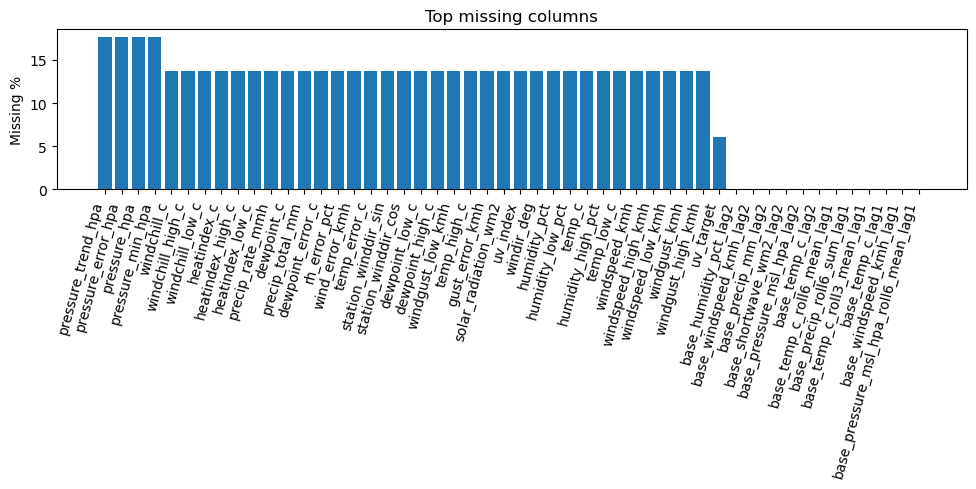

In [31]:
missing_pct = (fe.isna().mean() * 100).sort_values(ascending=False)
missing_nonzero = missing_pct[missing_pct > 0]

print("Columns with missing values:", len(missing_nonzero))
display(missing_nonzero.head(50).to_frame("missing_%"))
top_missing = missing_nonzero.head(50)

plt.figure(figsize=(10, 5))
plt.bar(top_missing.index.astype(str), top_missing.values)
plt.xticks(rotation=75, ha="right")
plt.ylabel("Missing %")
plt.title("Top missing columns")
plt.tight_layout()
plt.show()

In [32]:
candidate_targets = [
    "temp_error_c",
    "wind_error_kmh",
    "rh_error_pct",
    "dewpoint_error_c",
    "pressure_error_hpa",
    "gust_error_kmh",
    "winddir_error_deg",
    "rain_error_mm",
    "uv_target",
]

target_cols = [c for c in candidate_targets if c in fe.columns]
print("Detected targets:", target_cols)

if target_cols:
    target_summary = fe[target_cols].describe().T
    target_summary["missing_%"] = fe[target_cols].isna().mean() * 100
    display(target_summary)
else:
    print("No target columns found.")

Detected targets: ['temp_error_c', 'wind_error_kmh', 'rh_error_pct', 'dewpoint_error_c', 'pressure_error_hpa', 'gust_error_kmh', 'uv_target']


,count,mean,std,min,25%,50%,75%,max,missing_%
temp_error_c,2382.0,0.113812,1.524243,-7.00,-0.60,0.10,0.80,6.60,13.758146
wind_error_kmh,2382.0,-0.873636,5.454451,-17.40,-4.80,-1.20,2.90,17.90,13.758146
rh_error_pct,2382.0,0.797439,9.714823,-51.00,-5.00,1.00,7.00,35.00,13.758146
dewpoint_error_c,2382.0,1.063770,2.647889,-10.80,-0.60,0.60,2.20,13.30,13.758146
pressure_error_hpa,2275.0,-3.991991,4.433605,-10.66,-6.81,-5.42,-2.06,8.26,17.632151
gust_error_kmh,2382.0,-4.046683,9.713676,-43.20,-9.30,-3.30,1.90,31.60,13.758146
uv_target,2595.0,0.700193,1.055651,0.00,0.00,0.00,1.00,4.00,6.046343


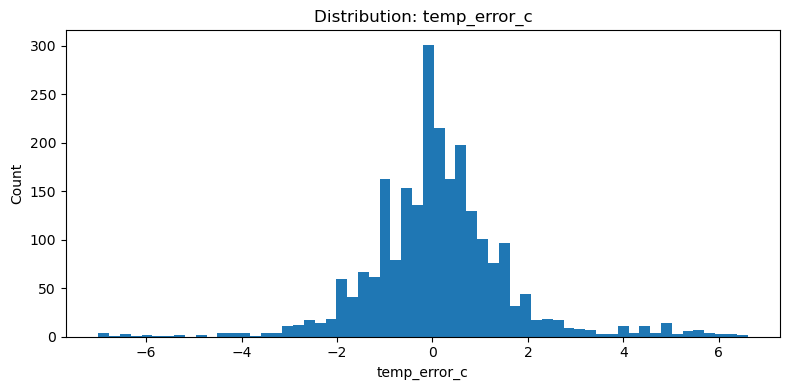

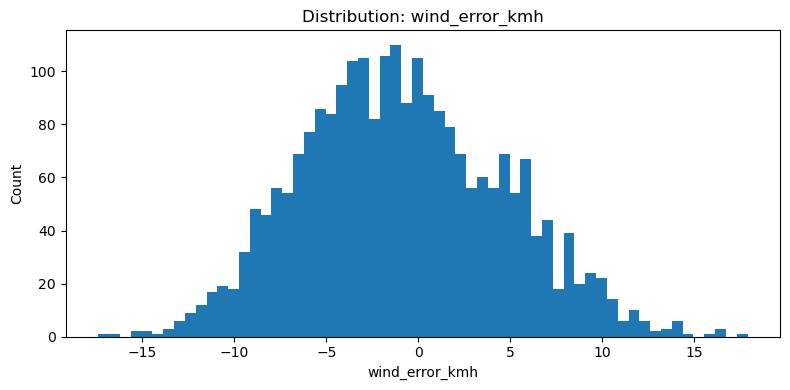

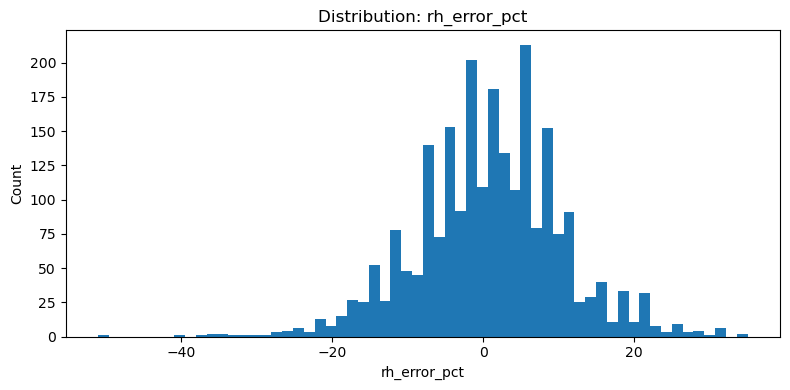

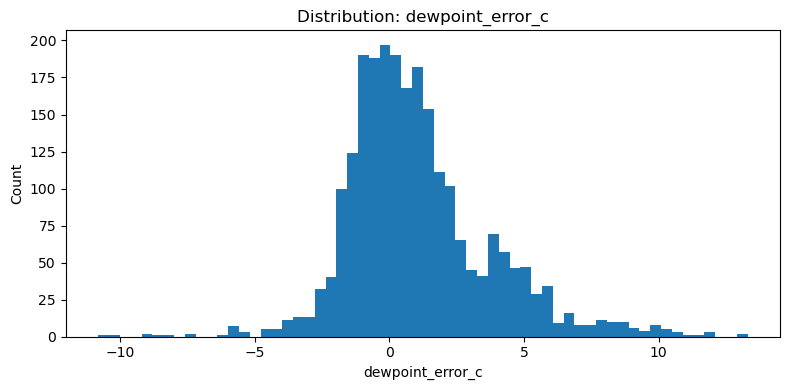

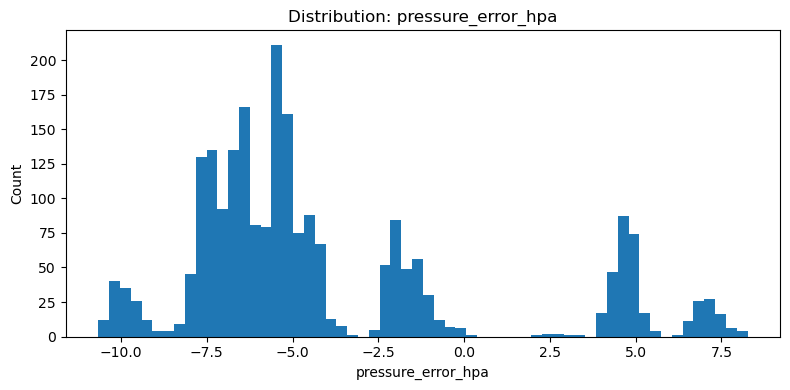

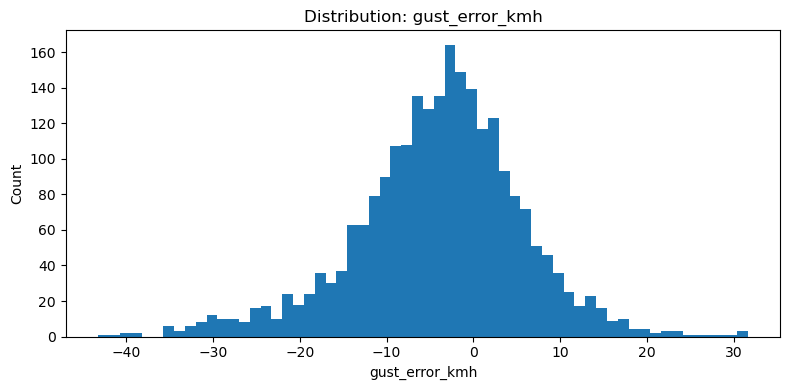

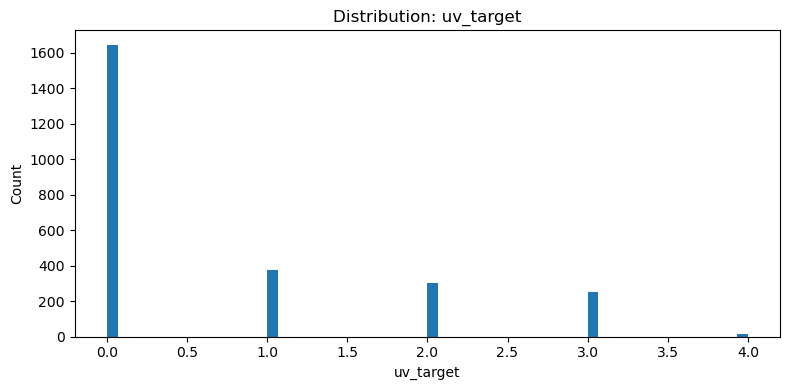

In [33]:
for c in target_cols:
    vals = fe[c].dropna()
    if len(vals) == 0:
        continue

    plt.figure(figsize=(8, 4))
    plt.hist(vals, bins=60)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

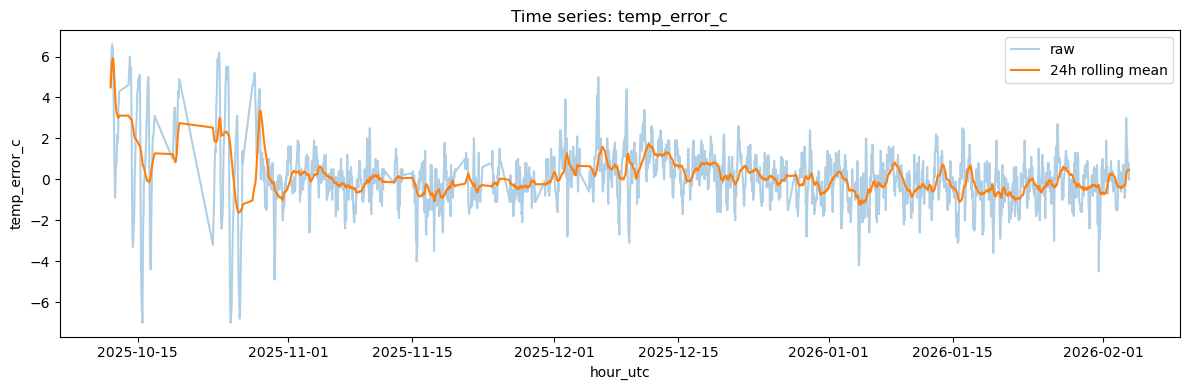

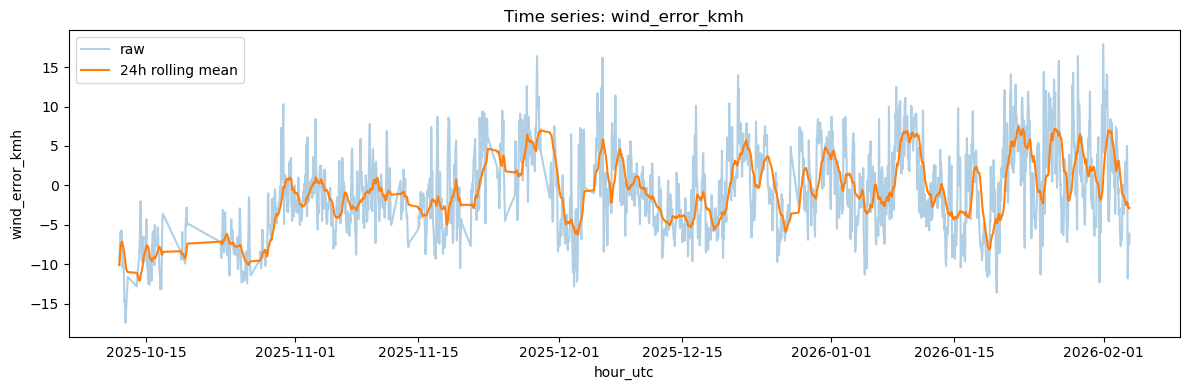

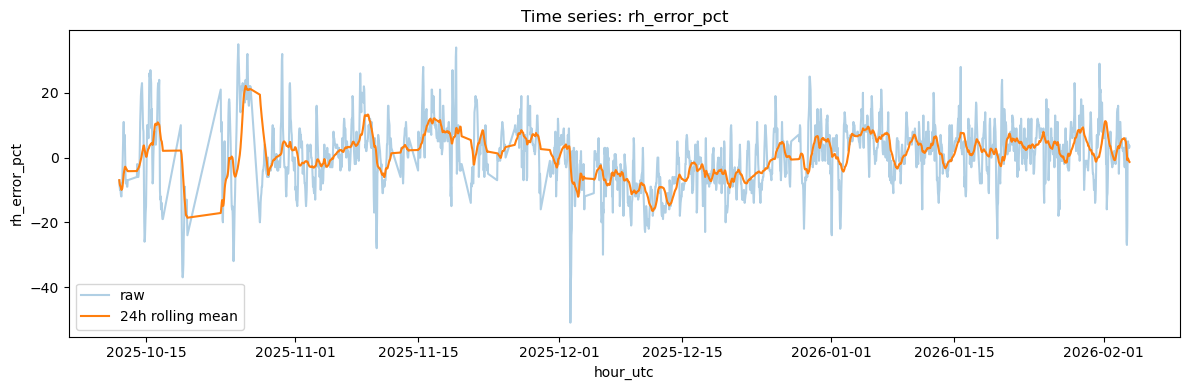

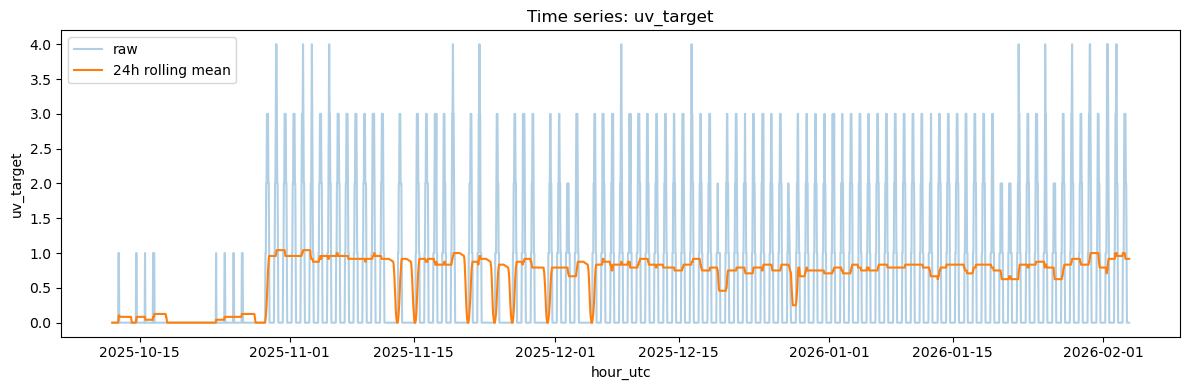

In [34]:
plot_targets = [c for c in ["temp_error_c", "wind_error_kmh", "rh_error_pct", "uv_target"] if c in fe.columns]

for c in plot_targets:
    s = fe[["hour_utc", c]].dropna().copy()
    if s.empty:
        continue
    s["roll24"] = s[c].rolling(24, min_periods=1).mean()

    plt.figure(figsize=(12, 4))
    plt.plot(s["hour_utc"], s[c], alpha=0.35, label="raw")
    plt.plot(s["hour_utc"], s["roll24"], label="24h rolling mean")
    plt.title(f"Time series: {c}")
    plt.xlabel("hour_utc")
    plt.ylabel(c)
    plt.legend()
    plt.tight_layout()
    plt.show()

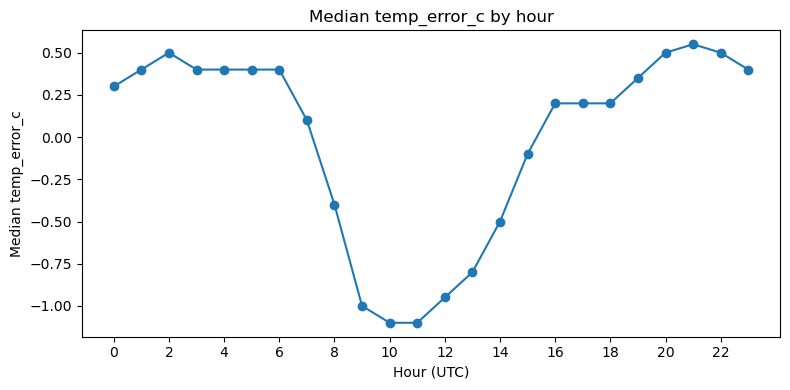

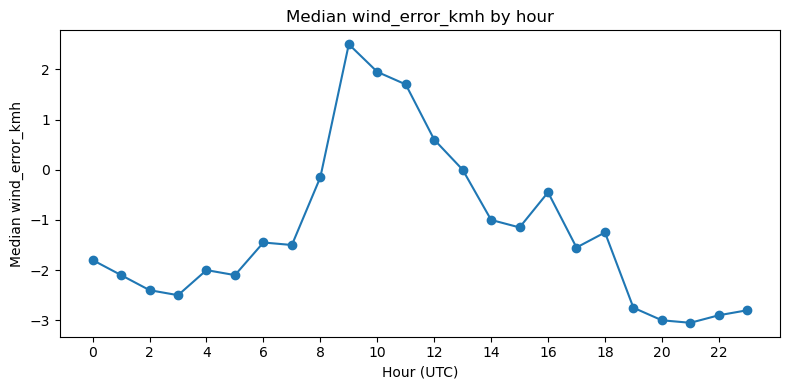

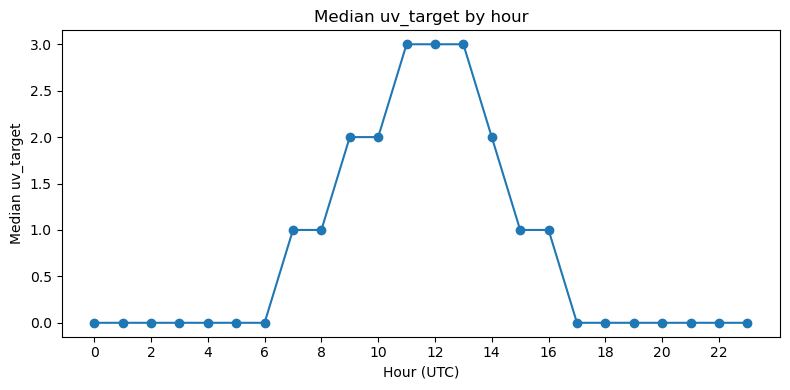

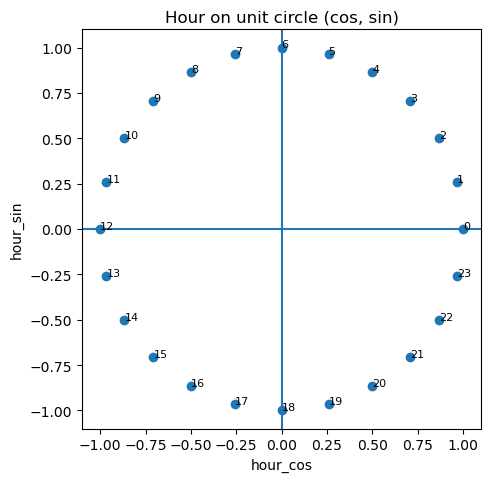

In [35]:
if "hour" not in fe.columns:
    fe["hour"] = fe["hour_utc"].dt.hour

hourly_profiles = {}
for c in ["temp_error_c", "wind_error_kmh", "uv_target"]:
    if c in fe.columns:
        hourly_profiles[c] = fe.groupby("hour")[c].median()

for c, prof in hourly_profiles.items():
    plt.figure(figsize=(8, 4))
    plt.plot(prof.index, prof.values, marker="o")
    plt.title(f"Median {c} by hour")
    plt.xlabel("Hour (UTC)")
    plt.ylabel(f"Median {c}")
    plt.xticks(range(0, 24, 2))
    plt.tight_layout()
    plt.show()

if all(col in fe.columns for col in ["hour_sin", "hour_cos", "hour"]):
    tmp = fe[["hour", "hour_sin", "hour_cos"]].drop_duplicates().sort_values("hour")
    plt.figure(figsize=(5, 5))
    plt.scatter(tmp["hour_cos"], tmp["hour_sin"])
    for _, r in tmp.iterrows():
        plt.text(r["hour_cos"], r["hour_sin"], str(int(r["hour"])), fontsize=8)
    plt.axhline(0)
    plt.axvline(0)
    plt.gca().set_aspect("equal", "box")
    plt.title("Hour on unit circle (cos, sin)")
    plt.xlabel("hour_cos")
    plt.ylabel("hour_sin")
    plt.tight_layout()
    plt.show()

Sample day: 2025-10-12
Missing % on sun columns:


,missing_%
is_day,0.0
minutes_from_sunrise,0.0
minutes_to_sunset,0.0
solar_progress_0_1,0.0
solar_cycle,0.0


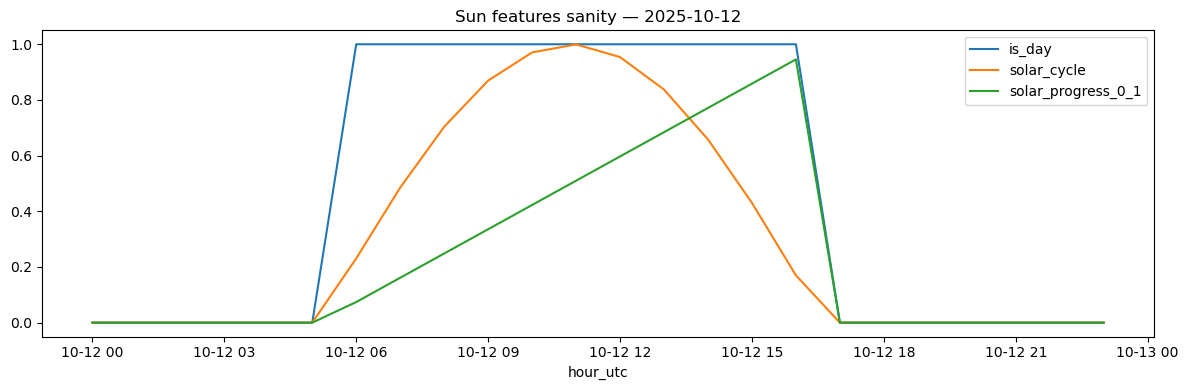

In [36]:
sun_cols_needed = ["is_day", "minutes_from_sunrise", "minutes_to_sunset", "solar_progress_0_1", "solar_cycle"]
have_sun = all(c in fe.columns for c in sun_cols_needed)

if have_sun:
    day_counts = fe.assign(date=fe["hour_utc"].dt.date).groupby("date")["solar_cycle"].count()
    sample_day = day_counts.idxmax()

    d = fe[fe["hour_utc"].dt.date == sample_day].copy()

    print("Sample day:", sample_day)
    print("Missing % on sun columns:")
    display((d[sun_cols_needed].isna().mean() * 100).to_frame("missing_%"))

    plt.figure(figsize=(12, 4))
    plt.plot(d["hour_utc"], d["is_day"], label="is_day")
    plt.plot(d["hour_utc"], d["solar_cycle"], label="solar_cycle")
    plt.plot(d["hour_utc"], d["solar_progress_0_1"], label="solar_progress_0_1")
    plt.title(f"Sun features sanity — {sample_day}")
    plt.xlabel("hour_utc")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Sun feature columns not fully available; skipped.")

In [37]:
rows = []

if "is_day" in fe.columns:
    for t in ["temp_error_c", "wind_error_kmh", "uv_target"]:
        if t in fe.columns:
            day_mae = fe.loc[fe["is_day"] == 1, t].abs().mean()
            night_mae = fe.loc[fe["is_day"] == 0, t].abs().mean()
            rows.append({"target": t, "regime": "day", "MAE_abs": day_mae})
            rows.append({"target": t, "regime": "night", "MAE_abs": night_mae})

if "base_rain_event" in fe.columns:
    for t in ["temp_error_c", "wind_error_kmh"]:
        if t in fe.columns:
            wet_mae = fe.loc[fe["base_rain_event"] == 1, t].abs().mean()
            dry_mae = fe.loc[fe["base_rain_event"] == 0, t].abs().mean()
            rows.append({"target": t, "regime": "wet", "MAE_abs": wet_mae})
            rows.append({"target": t, "regime": "dry", "MAE_abs": dry_mae})

regime_df = pd.DataFrame(rows)
display(regime_df)

,target,regime,MAE_abs
0,temp_error_c,day,1.159273
1,temp_error_c,night,0.952320
2,wind_error_kmh,day,4.460325
3,wind_error_kmh,night,4.538847
4,uv_target,day,1.737094
5,uv_target,night,0.000000
6,temp_error_c,wet,1.402062
7,temp_error_c,dry,1.027965
8,wind_error_kmh,wet,4.680412
9,wind_error_kmh,dry,4.496893



Top 20 correlated features for temp_error_c


,feature,corr_with_target,abs_corr,sign
0,base_et0_fao_mm,-0.557775,0.557775,negative
1,base_shortwave_wm2,-0.489667,0.489667,negative
2,base_shortwave_nonneg,-0.489667,0.489667,negative
3,base_direct_wm2,-0.477857,0.477857,negative
4,base_vpd_kpa,-0.466794,0.466794,negative
5,base_dni_wm2,-0.462836,0.462836,negative
6,solar_cycle,-0.461837,0.461837,negative
7,base_shortwave_wm2_lag1,-0.453255,0.453255,negative
8,base_diffuse_wm2,-0.444739,0.444739,negative
9,base_sunshine_sec,-0.435385,0.435385,negative


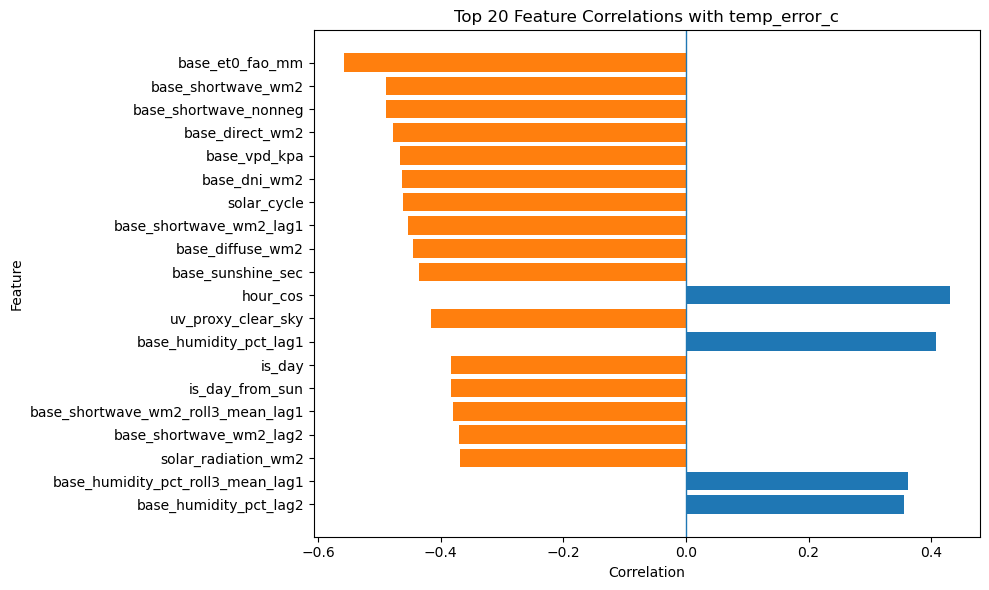


Top 20 correlated features for wind_error_kmh


,feature,corr_with_target,abs_corr,sign
0,windspeed_high_kmh,0.757059,0.757059,positive
1,windgust_low_kmh,0.714243,0.714243,positive
2,windgust_high_kmh,0.710744,0.710744,positive
3,windspeed_low_kmh,0.709631,0.709631,positive
4,base_winddir_sin,-0.560749,0.560749,negative
5,station_winddir_sin,-0.531608,0.531608,negative
6,base_temp_c_roll6_mean_lag1,-0.433903,0.433903,negative
7,heatindex_low_c,-0.402400,0.402400,negative
8,temp_low_c,-0.394416,0.394416,negative
9,windchill_low_c,-0.392440,0.392440,negative


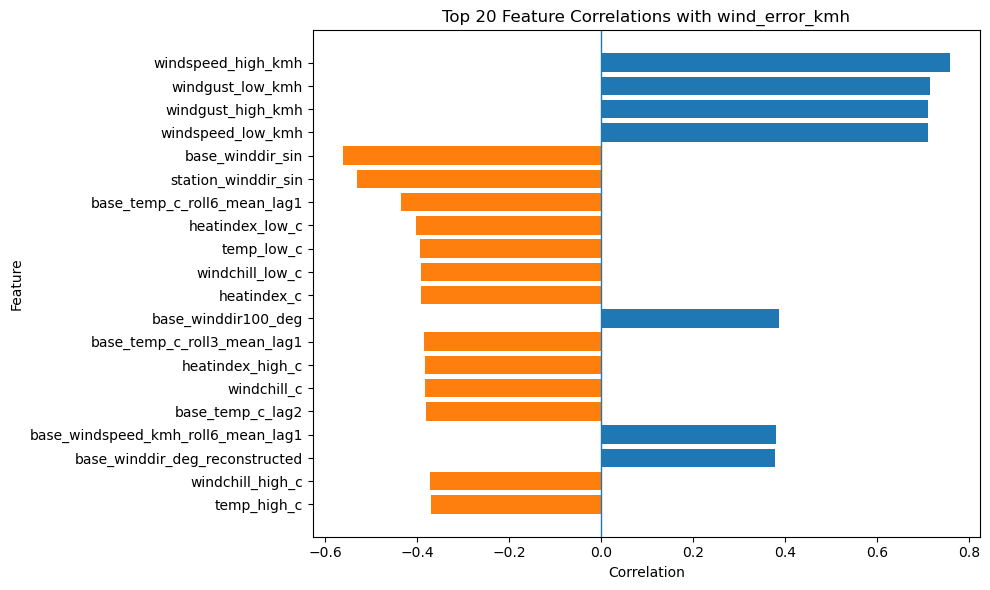


Top 20 correlated features for rh_error_pct


,feature,corr_with_target,abs_corr,sign
0,base_vpd_kpa,0.714531,0.714531,positive
1,base_humidity_pct_lag1,-0.703422,0.703422,negative
2,base_humidity_pct_roll3_mean_lag1,-0.629102,0.629102,negative
3,base_humidity_pct_lag2,-0.615937,0.615937,negative
4,base_et0_fao_mm,0.588442,0.588442,positive
5,base_humidity_pct_roll6_mean_lag1,-0.539059,0.539059,negative
6,base_shortwave_wm2_lag1,0.416623,0.416623,positive
7,base_shortwave_nonneg,0.414477,0.414477,positive
8,base_shortwave_wm2,0.414477,0.414477,positive
9,base_direct_wm2,0.413721,0.413721,positive


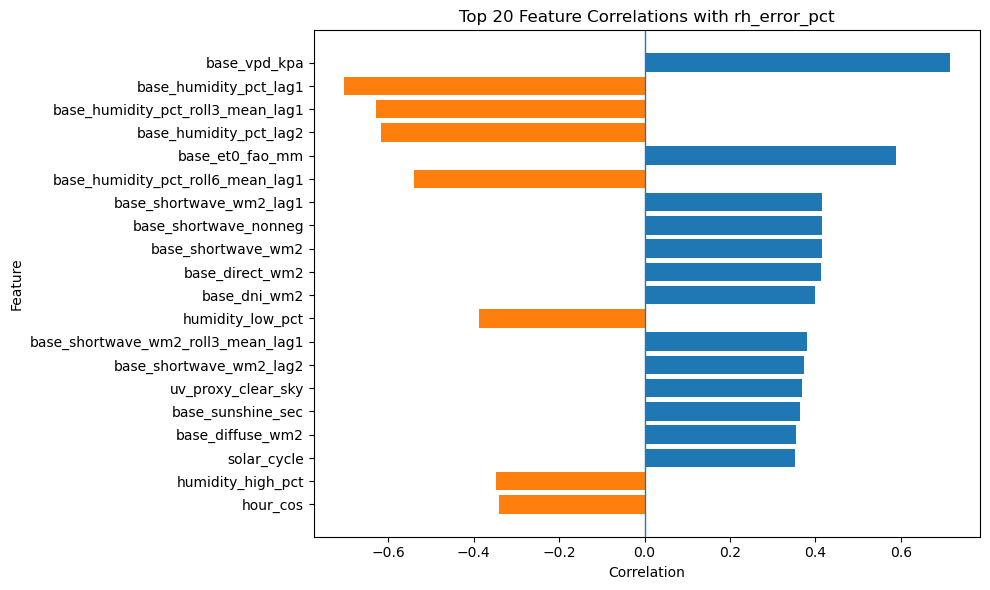


Top 20 correlated features for dewpoint_error_c


,feature,corr_with_target,abs_corr,sign
0,base_vpd_kpa,0.756968,0.756968,positive
1,base_humidity_pct_lag1,-0.684928,0.684928,negative
2,base_humidity_pct_roll3_mean_lag1,-0.625025,0.625025,negative
3,base_humidity_pct_lag2,-0.612213,0.612213,negative
4,base_humidity_pct_roll6_mean_lag1,-0.552211,0.552211,negative
5,humidity_low_pct,-0.454975,0.454975,negative
6,base_et0_fao_mm,0.452227,0.452227,positive
7,base_temp_c_lag1,0.431234,0.431234,positive
8,humidity_high_pct,-0.428537,0.428537,negative
9,base_temp_c_roll3_mean_lag1,0.398937,0.398937,positive


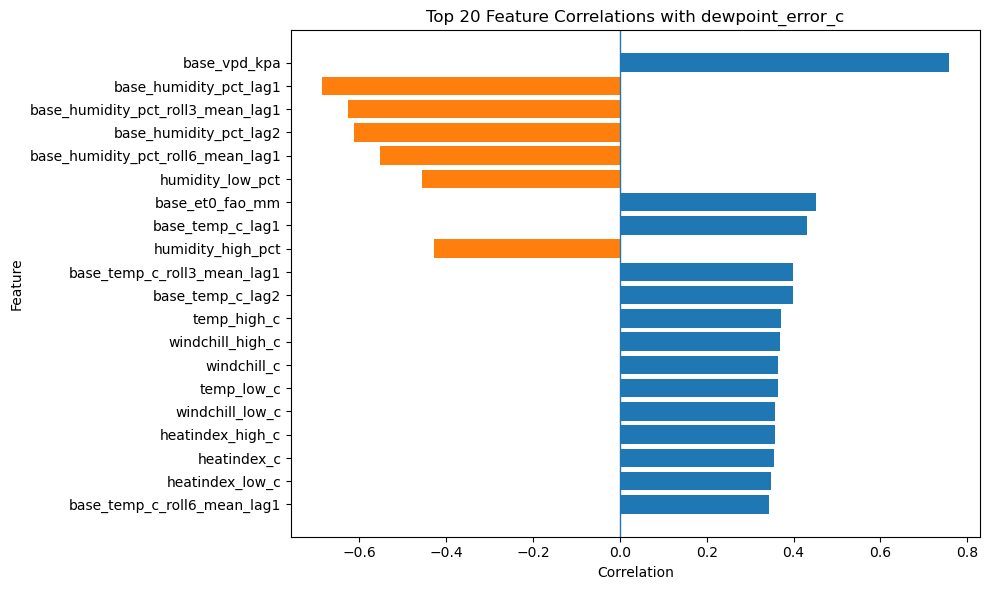


Top 20 correlated features for pressure_error_hpa


,feature,corr_with_target,abs_corr,sign
0,pressure_min_hpa,0.432229,0.432229,positive
1,base_pressure_msl_hpa_roll6_mean_lag1,-0.317741,0.317741,negative
2,base_pressure_msl_hpa_roll3_mean_lag1,-0.310602,0.310602,negative
3,base_pressure_msl_hpa_lag2,-0.309577,0.309577,negative
4,base_pressure_msl_hpa_lag1,-0.307116,0.307116,negative
5,base_surface_pressure_hpa,-0.305304,0.305304,negative
6,base_winddir_sin,-0.272985,0.272985,negative
7,station_winddir_sin,-0.262553,0.262553,negative
8,base_humidity_pct_roll6_mean_lag1,-0.228248,0.228248,negative
9,base_humidity_pct_lag1,-0.226765,0.226765,negative


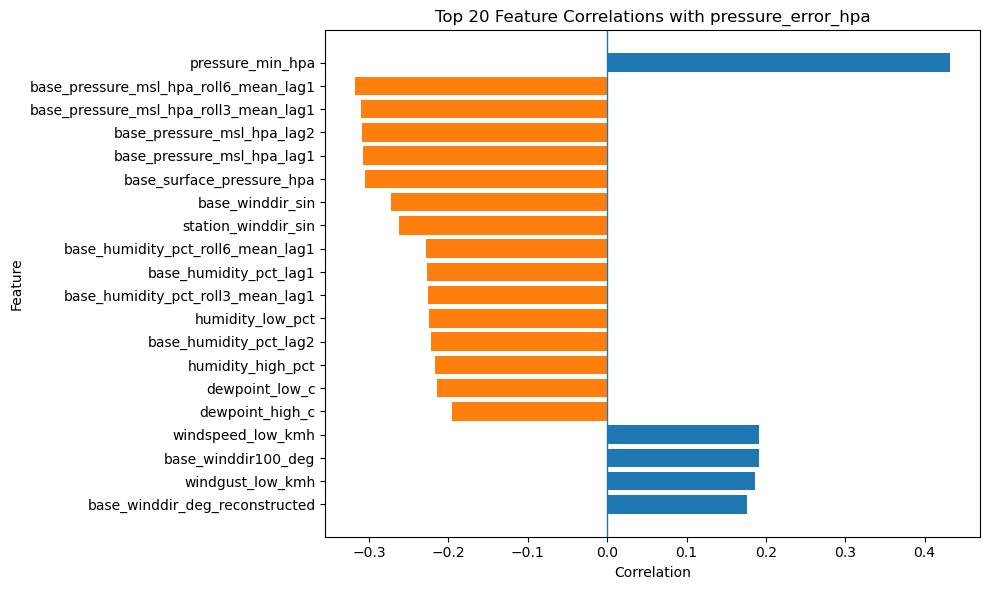


Top 20 correlated features for gust_error_kmh


,feature,corr_with_target,abs_corr,sign
0,windgust_high_kmh,0.591859,0.591859,positive
1,windspeed_high_kmh,0.587431,0.587431,positive
2,windgust_low_kmh,0.467701,0.467701,positive
3,heatindex_low_c,-0.463009,0.463009,negative
4,daylight_duration_sec,-0.458407,0.458407,negative
5,temp_low_c,-0.452771,0.452771,negative
6,windspeed_low_kmh,0.452515,0.452515,positive
7,base_temp_c_roll6_mean_lag1,-0.450840,0.450840,negative
8,heatindex_c,-0.448794,0.448794,negative
9,windchill_low_c,-0.446202,0.446202,negative


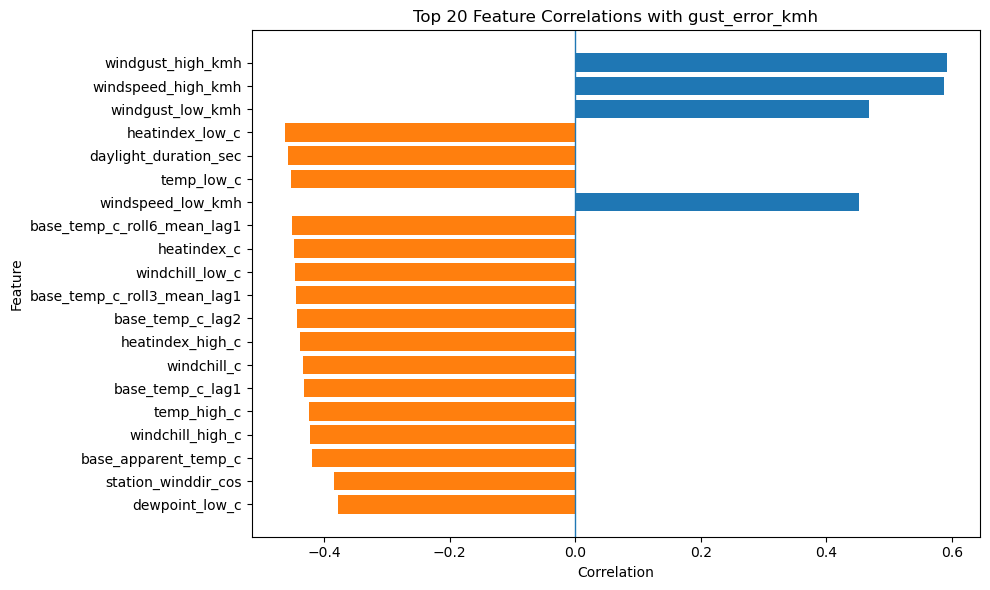


Top 20 correlated features for uv_target


,feature,corr_with_target,abs_corr,sign
0,solar_radiation_wm2,0.964919,0.964919,positive
1,solar_cycle,0.877605,0.877605,positive
2,base_shortwave_wm2,0.845146,0.845146,positive
3,base_shortwave_nonneg,0.845146,0.845146,positive
4,base_diffuse_wm2,0.843605,0.843605,positive
5,base_dni_wm2,0.821182,0.821182,positive
6,base_sunshine_sec,0.816849,0.816849,positive
7,is_day_from_sun,0.807311,0.807311,positive
8,is_day,0.807311,0.807311,positive
9,base_shortwave_wm2_lag1,0.796901,0.796901,positive


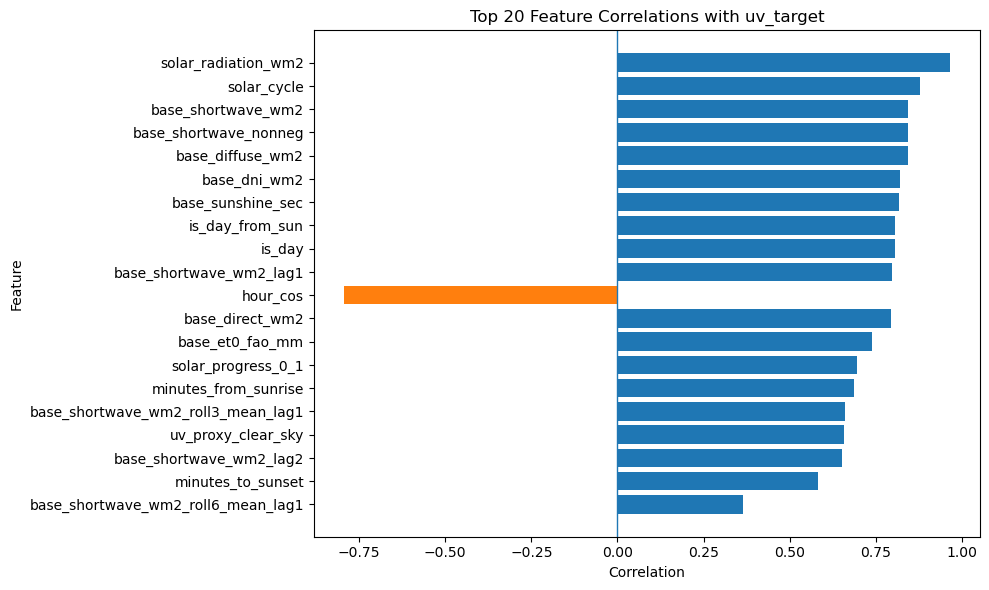

Targets processed: ['temp_error_c', 'wind_error_kmh', 'rh_error_pct', 'dewpoint_error_c', 'pressure_error_hpa', 'gust_error_kmh', 'uv_target']


In [38]:
numeric_cols = fe.select_dtypes(include=[np.number]).columns.tolist()

candidate_targets = [
    "temp_error_c",
    "wind_error_kmh",
    "rh_error_pct",
    "dewpoint_error_c",
    "pressure_error_hpa",
    "gust_error_kmh",
    "winddir_error_deg",
    "rain_error_mm",
    "uv_target",
]
target_cols = [c for c in candidate_targets if c in numeric_cols]

if len(target_cols) == 0:
    raise ValueError("No target columns found in fe.")

feature_pool = [c for c in numeric_cols if c not in target_cols]

# Optional leakage guard
leakage_like = {
     "temp_c","windspeed_kmh","humidity_pct","dewpoint_c","pressure_hpa","windgust_kmh","windir_deg","precip_total_mm","uv_index",
     "base_temp_c","base_windspeed_kmh","base_humidity_pct","base_dewpoint_c","base_pressure_msl_hpa","base_windgusts_kmh","base_winddirection_deg","base_precip_mm"
 }
feature_pool = [c for c in feature_pool if c not in leakage_like]

top_k = 20
top_features_by_target = {}
top_tables_by_target = {}

for t in target_cols:
    
    corr_series = fe[feature_pool + [t]].corr(numeric_only=True)[t].drop(labels=[t]).dropna()

    if corr_series.empty:
        print(f"\n===== {t} =====")
        print("No valid correlations found.")
        continue

    top = corr_series.reindex(corr_series.abs().sort_values(ascending=False).index).head(top_k)

    top_df = pd.DataFrame({
        "feature": top.index,
        "corr_with_target": top.values,
        "abs_corr": np.abs(top.values),
        "sign": np.where(top.values >= 0, "positive", "negative")
    }).reset_index(drop=True)

    top_features_by_target[t] = top_df["feature"].tolist()
    top_tables_by_target[t] = top_df

    print(f"\nTop {top_k} correlated features for {t}")
    display(top_df)
    
    plot_df = top_df.iloc[::-1].copy()
    bar_colors = np.where(plot_df["corr_with_target"] >= 0, "tab:blue", "tab:orange")

    plt.figure(figsize=(10, 6))
    plt.barh(plot_df["feature"], plot_df["corr_with_target"], color=bar_colors)
    plt.axvline(0, linewidth=1)
    plt.title(f"Top {top_k} Feature Correlations with {t}")
    plt.xlabel("Correlation")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
print("Targets processed:", list(top_features_by_target.keys()))

Heatmap matrix shape: (50, 7)


,temp_error_c,wind_error_kmh,rh_error_pct,dewpoint_error_c,pressure_error_hpa,gust_error_kmh,uv_target
solar_radiation_wm2,-0.368938,0.302723,0.297906,0.143558,0.050614,0.110716,0.964919
solar_cycle,-0.461837,0.206235,0.351836,0.173685,0.017350,-0.031736,0.877605
base_shortwave_wm2,-0.489667,0.166409,0.414477,0.248622,0.026776,-0.089257,0.845146
base_shortwave_nonneg,-0.489667,0.166409,0.414477,0.248622,0.026776,-0.089257,0.845146
base_diffuse_wm2,-0.444739,0.149834,0.355210,0.191057,0.003895,-0.096647,0.843605
base_dni_wm2,-0.462836,0.202920,0.398575,0.235586,0.036874,-0.043031,0.821182
base_sunshine_sec,-0.435385,0.189446,0.364406,0.196858,0.027237,-0.058309,0.816849
is_day_from_sun,-0.382709,0.187405,0.302379,0.147306,0.007069,-0.045492,0.807311
is_day,-0.382709,0.187405,0.302379,0.147306,0.007069,-0.045492,0.807311
base_shortwave_wm2_lag1,-0.453255,0.126975,0.416623,0.276551,0.027542,-0.142066,0.796901


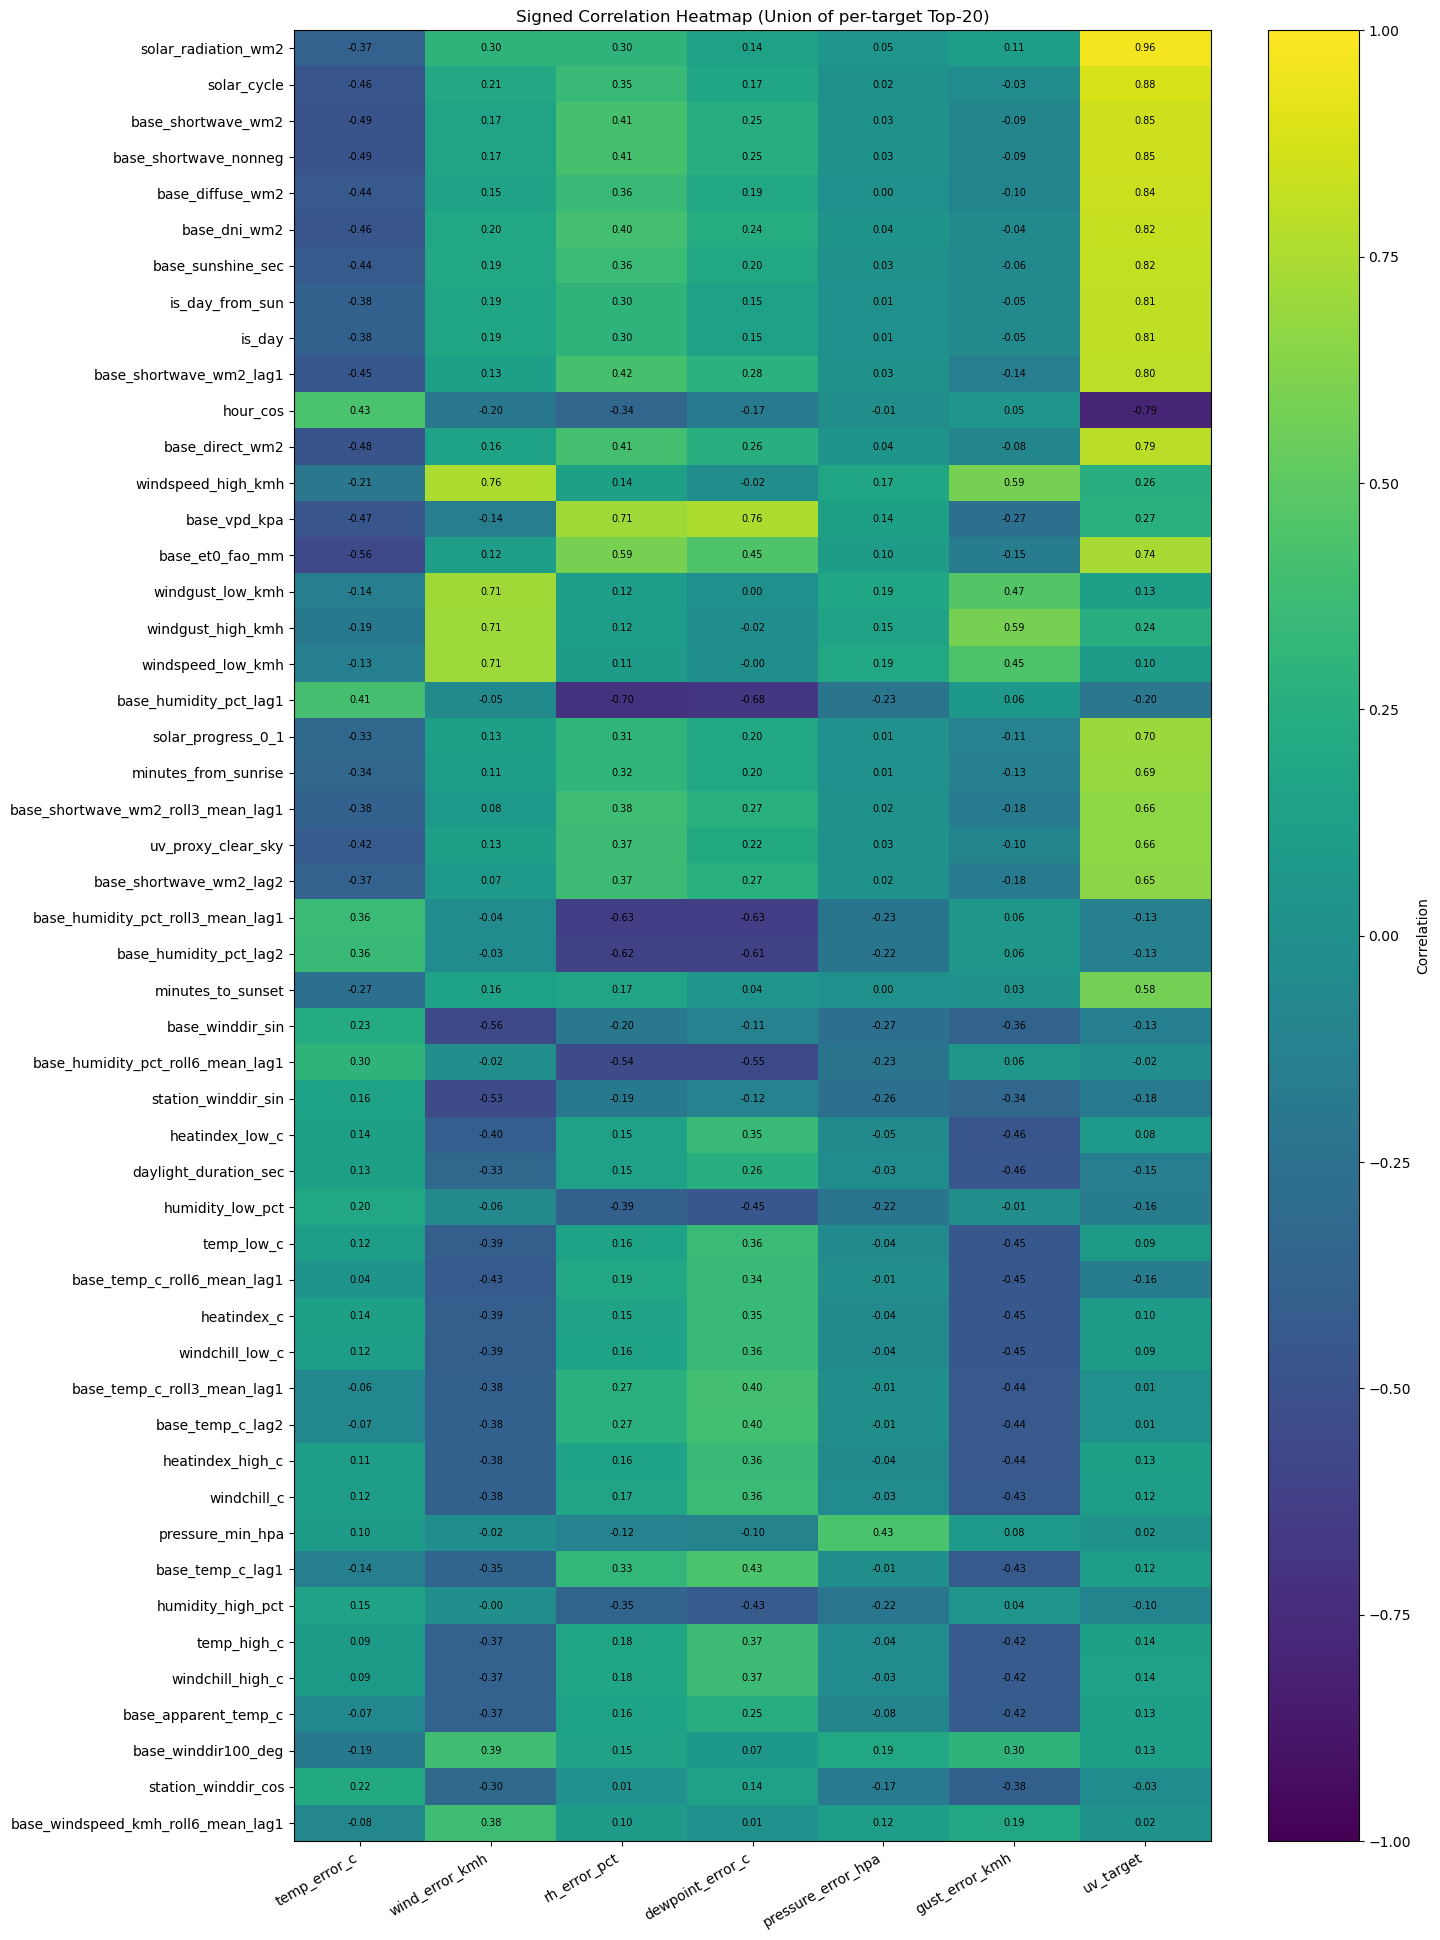

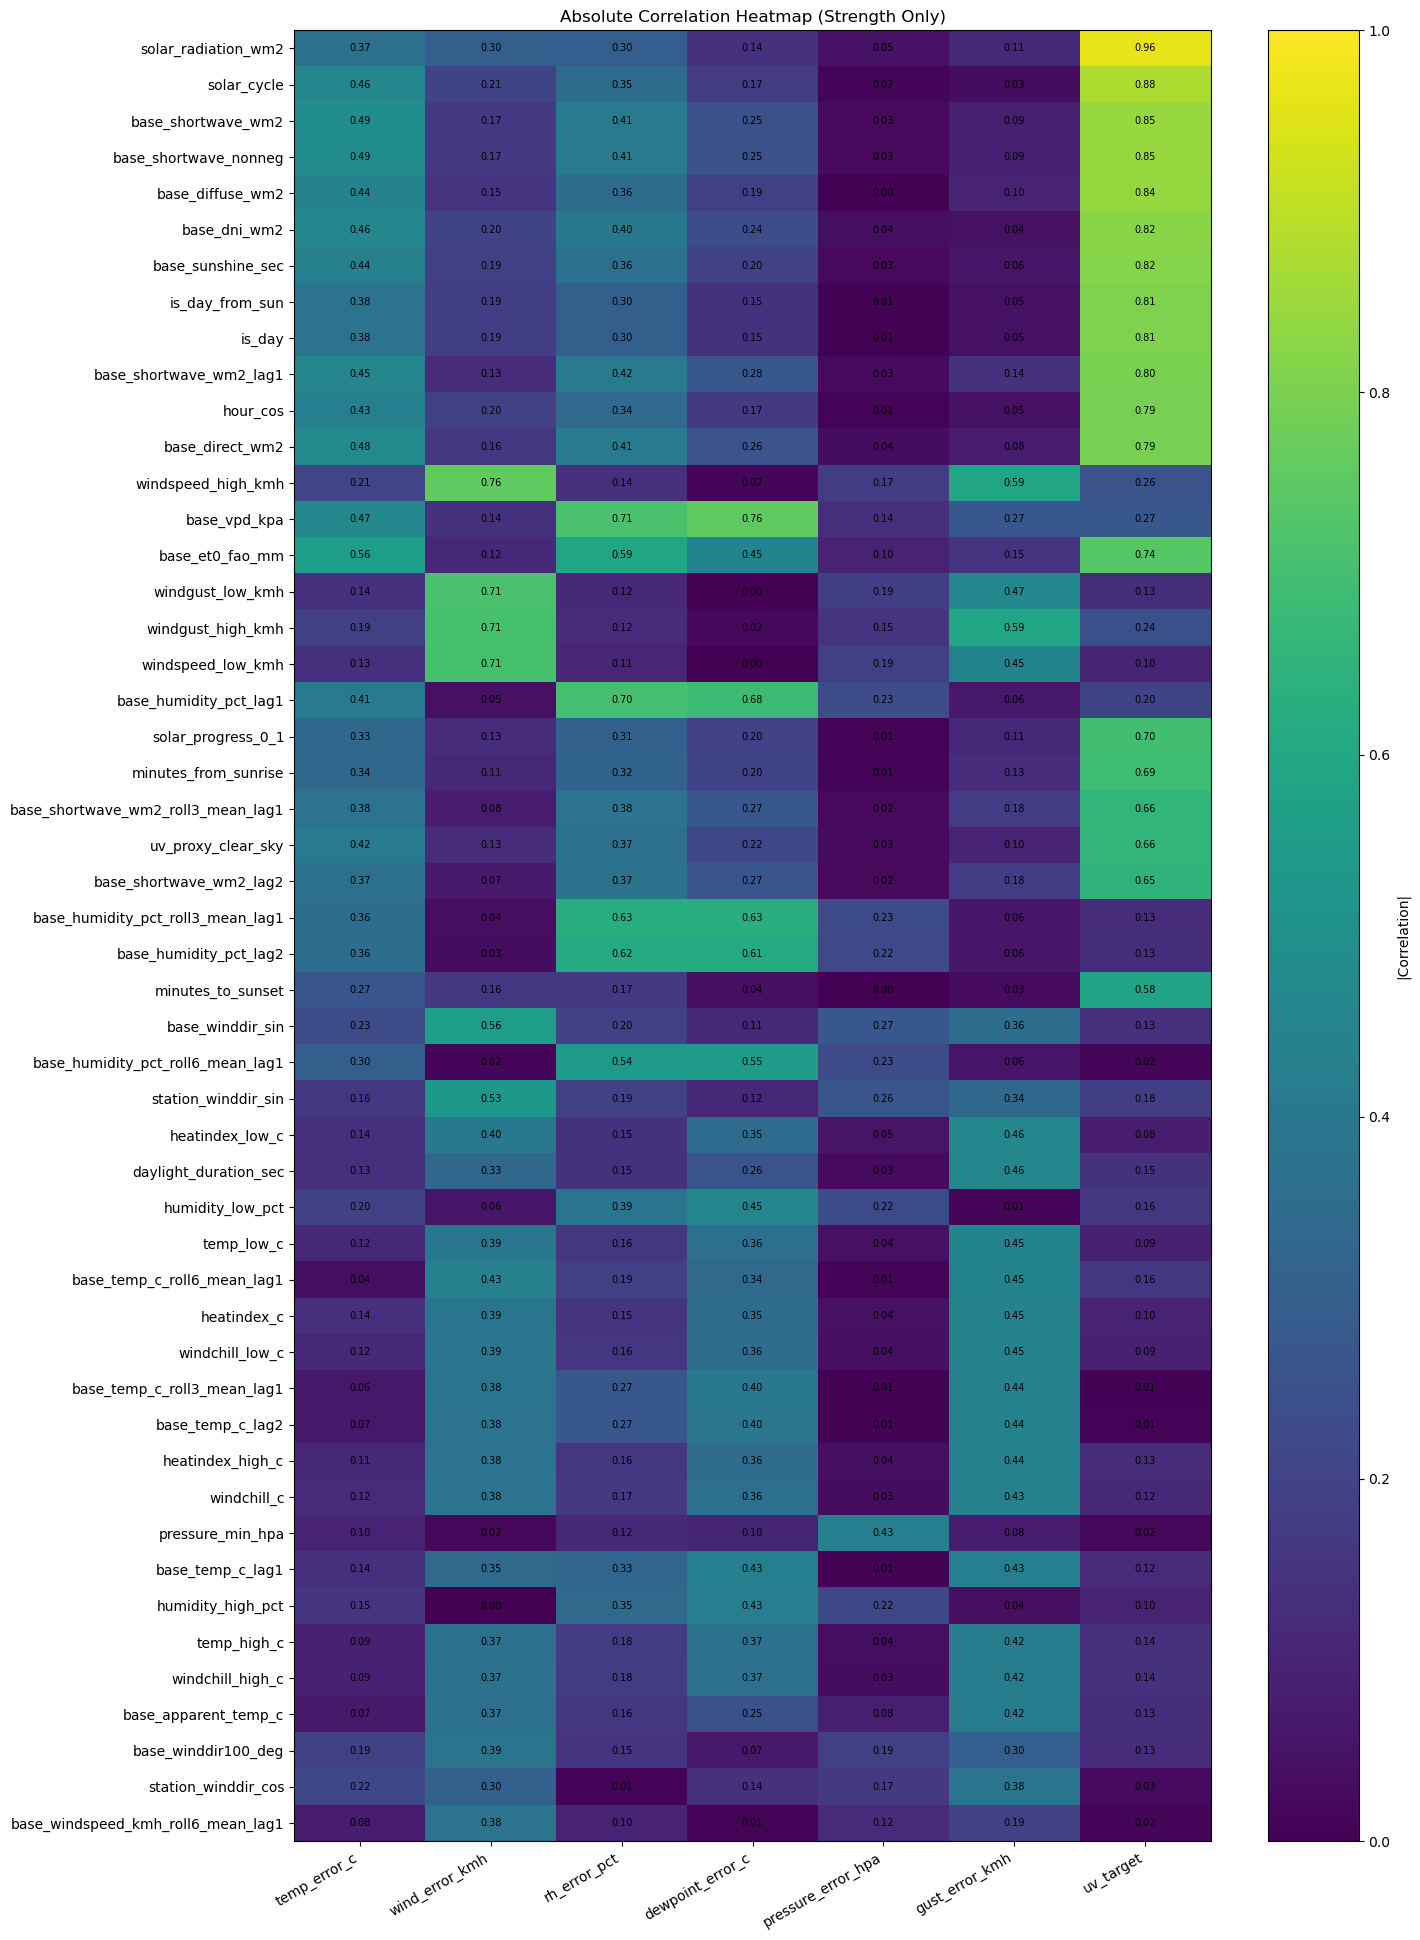

In [39]:
top_features_union = sorted(set(
    f for t, feats in top_features_by_target.items() for f in feats
))

corr_ft = fe[top_features_union + target_cols].corr(numeric_only=True).loc[top_features_union, target_cols]

corr_ft = corr_ft.dropna(how="all", axis=0)

row_strength = corr_ft.abs().max(axis=1).sort_values(ascending=False)
corr_ft = corr_ft.loc[row_strength.index]

max_rows = 50
if len(corr_ft) > max_rows:
    corr_ft = corr_ft.head(max_rows)

print("Heatmap matrix shape:", corr_ft.shape)
display(corr_ft.head(10))

fig, ax = plt.subplots(figsize=(2 + 1.8*len(target_cols), 2 + 0.35*len(corr_ft)))
im = ax.imshow(corr_ft.values, aspect="auto", vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(target_cols)))
ax.set_xticklabels(target_cols, rotation=30, ha="right")
ax.set_yticks(np.arange(len(corr_ft)))
ax.set_yticklabels(corr_ft.index)

for i in range(corr_ft.shape[0]):
    for j in range(corr_ft.shape[1]):
        v = corr_ft.iat[i, j]
        if pd.notna(v):
            ax.text(j, i, f"{v:.2f}", ha="center", va="center", fontsize=7)

ax.set_title("Signed Correlation Heatmap (Union of per-target Top-20)")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Correlation")
plt.tight_layout()
plt.show()

abs_ft = corr_ft.abs()

fig, ax = plt.subplots(figsize=(2 + 1.8*len(target_cols), 2 + 0.35*len(abs_ft)))
im = ax.imshow(abs_ft.values, aspect="auto", vmin=0, vmax=1)

ax.set_xticks(np.arange(len(target_cols)))
ax.set_xticklabels(target_cols, rotation=30, ha="right")
ax.set_yticks(np.arange(len(abs_ft)))
ax.set_yticklabels(abs_ft.index)

for i in range(abs_ft.shape[0]):
    for j in range(abs_ft.shape[1]):
        v = abs_ft.iat[i, j]
        if pd.notna(v):
            ax.text(j, i, f"{v:.2f}", ha="center", va="center", fontsize=7)

ax.set_title("Absolute Correlation Heatmap (Strength Only)")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("|Correlation|")
plt.tight_layout()
plt.show()

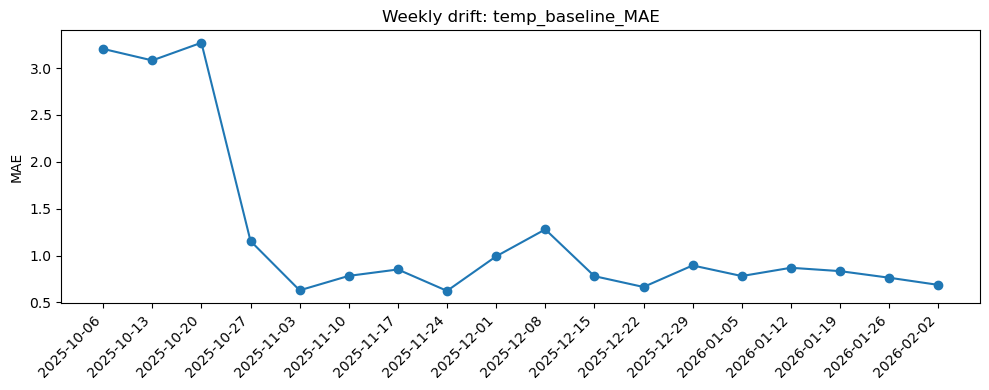

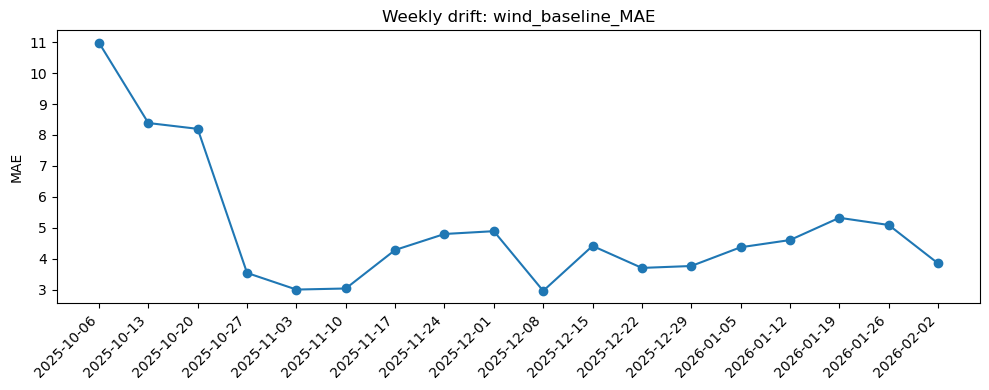

In [40]:
drift = fe.copy()
drift["week_start"] = drift["hour_utc"].dt.tz_convert(None).dt.to_period("W").dt.start_time

metrics = []

if all(c in drift.columns for c in ["temp_c", "base_temp_c"]):
    w = drift.groupby("week_start").apply(lambda x: (x["temp_c"] - x["base_temp_c"]).abs().mean())
    metrics.append(("temp_baseline_MAE", w))

if all(c in drift.columns for c in ["windspeed_kmh", "base_windspeed_kmh"]):
    w = drift.groupby("week_start").apply(lambda x: (x["windspeed_kmh"] - x["base_windspeed_kmh"]).abs().mean())
    metrics.append(("wind_baseline_MAE", w))

for name, series in metrics:
    plt.figure(figsize=(10, 4))
    plt.plot(series.index.astype(str), series.values, marker="o")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Weekly drift: {name}")
    plt.ylabel("MAE")
    plt.tight_layout()
    plt.show()

In [41]:
split_idx = int(len(fe) * 0.8)
split_time = fe.loc[split_idx, "hour_utc"]

train = fe.iloc[:split_idx].copy()
valid = fe.iloc[split_idx:].copy()

print("Split time:", split_time)
print("Train rows:", len(train), "| Valid rows:", len(valid))

rows = []
for t in target_cols:
    rows.append({
        "target": t,
        "train_mean": train[t].mean(),
        "valid_mean": valid[t].mean(),
        "train_std": train[t].std(),
        "valid_std": valid[t].std(),
        "train_missing_%": train[t].isna().mean() * 100,
        "valid_missing_%": valid[t].isna().mean() * 100,
    })

split_stats = pd.DataFrame(rows)
display(split_stats)

Split time: 2026-01-11 23:00:00+00:00
Train rows: 2209 | Valid rows: 553


,target,train_mean,valid_mean,train_std,valid_std,train_missing_%,valid_missing_%
0,temp_error_c,0.230109,-0.271739,1.622870,1.050416,17.157085,0.180832
1,wind_error_kmh,-1.337213,0.663225,5.191930,6.000209,17.157085,0.180832
2,rh_error_pct,0.104918,3.093297,10.174096,7.573289,17.157085,0.180832
3,dewpoint_error_c,1.029180,1.178442,2.721502,2.386393,17.157085,0.180832
4,pressure_error_hpa,-3.922972,-4.207428,4.312285,4.790319,22.000905,0.180832
5,gust_error_kmh,-4.403552,-2.863587,9.899616,8.977522,17.157085,0.180832
6,uv_target,0.670911,0.808318,1.037006,1.116154,7.559982,0.000000


In [42]:
# Save useful EDA outputs
missing_nonzero.to_frame("missing_%").to_csv("data/eda_missing_summary.csv")
if "target_summary" in locals():
    target_summary.to_csv("data/eda_target_summary.csv")
if "split_stats" in locals():
    split_stats.to_csv("data/eda_split_stats.csv", index=False)

print("Saved:")
print("- data/eda_missing_summary.csv")
if "target_summary" in locals():
    print("- data/eda_target_summary.csv")
if "split_stats" in locals():
    print("- data/eda_split_stats.csv")

Saved:
- data/eda_missing_summary.csv
- data/eda_target_summary.csv
- data/eda_split_stats.csv
